In [1]:
library(haven)
library(tidyverse)
library(broom)
library(lme4) 
library(latex2exp)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand



In [2]:
AA_Sex_1 <- read_sav("~/Documents/AA-leche-humana/datos/AMINOACIDOS POR SEXO_1.sav")
head(AA_Sex_1)

ID,GROUP,MATERNALAGE,SEXO,INFANTDOB,MATBMI1COLL,MATBMI215d,MATBMI32mos,MATBMI44mos,BABYWeigth1g,⋯,ALAGLOB,ASNGLOB,SYSGLOB,GLYGLOB,GLUGLOB,GLNGLOB,PROLINEGLOB,SERINEGLOB,TYRAMINEGLOB,new
<dbl>,<dbl+lbl>,<dbl>,<dbl+lbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,17,1,2009-08-20,25,24,24,22,3492.7,⋯,21.25,0.5,1.00,10.00,87.25,23.25,2.75,8.0,1.00,0
2,0,16,2,2009-08-24,32,31,30,29,3392.9,⋯,18.25,0.0,0.75,13.75,100.50,40.50,2.50,9.5,0.75,0
3,0,17,2,2009-08-21,23,23,NA,NA,2993.8,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
4,0,16,2,2009-08-21,26,NA,NA,NA,3692.3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
5,0,16,NA,2009-08-29,25,NA,NA,NA,3592.5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
6,0,16,2,2009-08-27,29,28,30,31,3093.5,⋯,15.50,0.5,1.50,10.25,74.75,30.00,5.25,8.0,2.00,0


In [3]:
names(AA_Sex_1)

[1] "ID"                       "GROUP"                   
  [3] "MATERNALAGE"              "SEXO"                    
  [5] "INFANTDOB"                "MATBMI1COLL"             
  [7] "MATBMI215d"               "MATBMI32mos"             
  [9] "MATBMI44mos"              "BABYWeigth1g"            
 [11] "BABYWeigth2g"             "BABYWeigth3g"            
 [13] "BABYWeigth4g"             "HeadCircumcm1"           
 [15] "HCcm2"                    "HCcm3"                   
 [17] "HCcm4"                    "MATHeight1m"             
 [19] "MATHeight2m"              "MATHeight3m"             
 [21] "MATHeight4m"              "MATWeight1kg"            
 [23] "MATWeight2kg"             "MATWeight3kg"            
 [25] "MATWeight4kg"             "A.TOTALCALORIESKcal"     
 [27] "B.TOTALCALORIESKcal"      "A.PROTEINg"              
 [29] "B.PROTEINg"               "A.CHOg"                  
 [31] "B.CHOg"                   "A.LIPIDSg"               
 [33] "B.LIPIDSg"                "A.GLUCOSEmgdL"           
 [35] "B.GLUCOSEmgdL"            "A.CHOLESTEROLmgdL"       
 [37] "B.CHOLESTEROLmgdL"        "A.TRIGLYCERIDSmgdL"      
 [39] "B.TRIGLYCERIDmgdL"        "A.HDLmgdL"               
 [41] "B.HDLmgdL"                "A.LDLmgdL"               
 [43] "B.LDLmgdL"                "A.PROTEINSgdL"           
 [45] "B.PROTEINSgdL"            "A.ALBUMINgdL"            
 [47] "B.ALBUMINgdL"             "edadr"                   
 [49] "Grupos"                   "CALOSTRUMtotalAA"        
 [51] "TRANSITIONtotalAA"        "MATURE2mtotalAA"         
 [53] "MATURE4mtotalAA"          "CALOSTRUMessentialAA"    
 [55] "TRANSITIONessentialAA"    "MATURE2messentialAA"     
 [57] "MATURE4messentialAA"      "ARGCalostrum"            
 [59] "ARGTransition"            "ARGMature2m"             
 [61] "ARGMature4m"              "HISCalostrum"            
 [63] "HISTransition"            "HISMature2m"             
 [65] "HISMature4m"              "ILECalostrum"            
 [67] "ILETransition"            "ILEMature2m"             
 [69] "ILEMature4m"              "LEUCalostrum"            
 [71] "LEUTransition"            "LEUMature2m"             
 [73] "LEUMature4m"              "LYSCalostrum"            
 [75] "LYSTransition"            "LYSMature2m"             
 [77] "LYSMature4m"              "METCalostrum"            
 [79] "METTransition"            "METMature2m"             
 [81] "METMature4m"              "PHECalostrum"            
 [83] "PHETransition"            "PHEMature2m"             
 [85] "PHEMature4m"              "THRCalostrum"            
 [87] "THRTransition"            "THRMature2m"             
 [89] "THRMature4m"              "TRPCalostrum"            
 [91] "TRPTransition"            "TRPMature2m"             
 [93] "TRPMature4m"              "VALCalostrum"            
 [95] "VALTransition"            "VALMature2m"             
 [97] "VALMature4m"              "CALOSTRUMnonessentialAA" 
 [99] "TRANSITIONnonessentialAA" "MATURE2mnonessentialAA"  
[101] "MATURE4mnonessentialAA"   "ASPCalostrum"            
[103] "ASPTransition"            "ASPMature2m"             
[105] "ASPMature4m"              "ALACalostrum"            
[107] "ALATransition"            "ALAMature2m"             
[109] "ALAMature4m"              "ASNCalostrum"            
[111] "ASNTransition"            "ASNMature2m"             
[113] "ASNMature4m"              "CYSCalostrum"            
[115] "CYSTransition"            "CYSMature2m"             
[117] "CYSMature4m"              "GLYCalostrum"            
[119] "GLYTransition"            "GLYMature2m"             
[121] "GLYMature4m"              "GLUCalostrum"            
[123] "GLUTransition"            "GLUMature2m"             
[125] "GLUMature4m"              "GLNCalostrum"            
[127] "GLNTransition"            "GLNMature2m"             
[129] "GLNMature4m"              "PROCalostrum"            
[131] "PROTransition"            "PROMature2m"             
[133] "PROMature4m"              "SERCalos

In [4]:
#str(AA_Sex_1)

In [5]:
print('Essential AA \n')
names(AA_Sex_1)[58]
names(AA_Sex_1)[97]

print('Prolyne \n')
names(AA_Sex_1)[130]
names(AA_Sex_1)[133]

print('Non essential AA \n')
names(AA_Sex_1)[102]
names(AA_Sex_1)[141]

[1] "Essential AA \n"


[1] "ARGCalostrum"

[1] "VALMature4m"

[1] "Prolyne \n"


[1] "PROCalostrum"

[1] "PROMature4m"

[1] "Non essential AA \n"


[1] "ASPCalostrum"

[1] "TYRMature4m"

In [6]:
AA_E <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 62:97) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 


names(AA_E)

[1] "id"            "group"         "age"           "sex"          
 [5] "HISCalostrum"  "HISTransition" "HISMature2m"   "HISMature4m"  
 [9] "ILECalostrum"  "ILETransition" "ILEMature2m"   "ILEMature4m"  
[13] "LEUCalostrum"  "LEUTransition" "LEUMature2m"   "LEUMature4m"  
[17] "LYSCalostrum"  "LYSTransition" "LYSMature2m"   "LYSMature4m"  
[21] "METCalostrum"  "METTransition" "METMature2m"   "METMature4m"  
[25] "PHECalostrum"  "PHETransition" "PHEMature2m"   "PHEMature4m"  
[29] "THRCalostrum"  "THRTransition" "THRMature2m"   "THRMature4m"  
[33] "TRPCalostrum"  "TRPTransition" "TRPMature2m"   "TRPMature4m"  
[37] "VALCalostrum"  "VALTransition" "VALMature2m"   "VALMature4m"

In [7]:
AA_NE <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 58:61, 102:141) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 

names(AA_NE)

[1] "id"            "group"         "age"           "sex"          
 [5] "ARGCalostrum"  "ARGTransition" "ARGMature2m"   "ARGMature4m"  
 [9] "ASPCalostrum"  "ASPTransition" "ASPMature2m"   "ASPMature4m"  
[13] "ALACalostrum"  "ALATransition" "ALAMature2m"   "ALAMature4m"  
[17] "ASNCalostrum"  "ASNTransition" "ASNMature2m"   "ASNMature4m"  
[21] "CYSCalostrum"  "CYSTransition" "CYSMature2m"   "CYSMature4m"  
[25] "GLYCalostrum"  "GLYTransition" "GLYMature2m"   "GLYMature4m"  
[29] "GLUCalostrum"  "GLUTransition" "GLUMature2m"   "GLUMature4m"  
[33] "GLNCalostrum"  "GLNTransition" "GLNMature2m"   "GLNMature4m"  
[37] "PROCalostrum"  "PROTransition" "PROMature2m"   "PROMature4m"  
[41] "SERCalostrum"  "SERTransition" "SERMature2m"   "SERMature4m"  
[45] "TYRCalostrum"  "TYRTransition" "TYRMature2m"   "TYRMature4m"

In [8]:
# Removing NAs
AA_E_Long <- AA_E %>% gather(weekNames, level, 5:length(names(AA_E))) 
AA_NE_Long <- AA_NE %>% gather(weekNames, level, 5:length(names(AA_NE))) 

head(AA_E_Long)

Warning message:
“attributes are not identical across measure variables;
they will be dropped”Warning message:
“attributes are not identical across measure variables;
they will be dropped”

id,group,age,sex,weekNames,level
<fct>,<fct>,<dbl>,<fct>,<chr>,<dbl>
1,teen,17,girl,HISCalostrum,2
2,teen,16,boy,HISCalostrum,1
3,teen,17,boy,HISCalostrum,2
4,teen,16,boy,HISCalostrum,1
5,teen,16,NA,HISCalostrum,1
6,teen,16,boy,HISCalostrum,1


In [9]:
AA_E_Long <- 
    AA_E_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "8", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_E_Long <- 
    AA_E_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_E_Long)

id,group,age,sex,weekNames,level,week,AA
<fct>,<fct>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<chr>
1,teen,17,girl,HISCalostrum,2,1,HIS
2,teen,16,boy,HISCalostrum,1,1,HIS
3,teen,17,boy,HISCalostrum,2,1,HIS
4,teen,16,boy,HISCalostrum,1,1,HIS
5,teen,16,NA,HISCalostrum,1,1,HIS
6,teen,16,boy,HISCalostrum,1,1,HIS


In [10]:
AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "8", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_NE_Long)

id,group,age,sex,weekNames,level,week,AA
<fct>,<fct>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<chr>
1,teen,17,girl,ARGCalostrum,1,1,ARG
2,teen,16,boy,ARGCalostrum,1,1,ARG
3,teen,17,boy,ARGCalostrum,1,1,ARG
4,teen,16,boy,ARGCalostrum,1,1,ARG
5,teen,16,NA,ARGCalostrum,2,1,ARG
6,teen,16,boy,ARGCalostrum,2,1,ARG


In [11]:
AA_E_Long %>% filter(id == 4) %>% head()

id,group,age,sex,weekNames,level,week,AA
<fct>,<fct>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<chr>
4,teen,16,boy,HISCalostrum,1,1,HIS
4,teen,16,boy,HISTransition,NA,2,HIS
4,teen,16,boy,HISMature2m,NA,8,HIS
4,teen,16,boy,HISMature4m,NA,16,HIS
4,teen,16,boy,ILECalostrum,0,1,ILE
4,teen,16,boy,ILETransition,NA,2,ILE


Warning message:
“Removed 640 rows containing non-finite values (stat_density).”

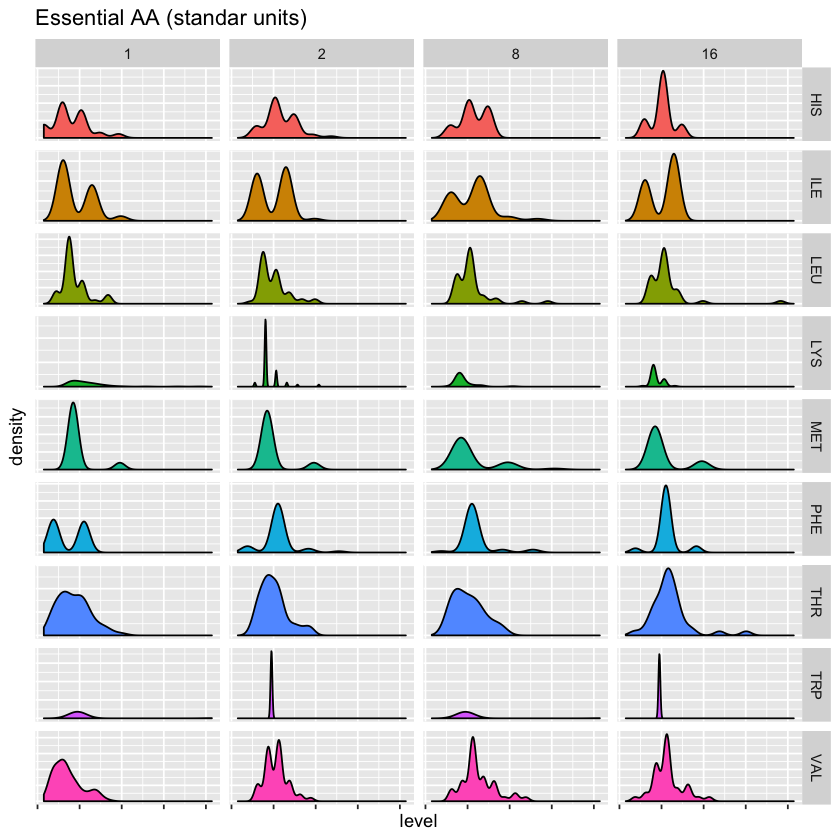

In [12]:
#png(filename="./plots/EAA_dist.png", units="cm", width=15, height=20, res = 300)

AA_E_Long_SU <- AA_E_Long %>% group_by(AA) %>% mutate(level = (level - mean(level, na.rm = TRUE))/sd(level, na.rm = TRUE))
 
ggplot(AA_E_Long_SU, aes(x = level, fill = AA)) + geom_density() + 
    guides(fill=FALSE) +
    facet_grid(AA ~ week, scales = "free_y") +
    theme( 
      #strip.background = element_blank(),
      axis.ticks.y = element_blank(),
      axis.text.y = element_blank(),
      axis.text.x = element_blank()
    ) + ggtitle('Essential AA (standar units)') 

#dev.off()


Warning message:
“Removed 781 rows containing non-finite values (stat_density).”

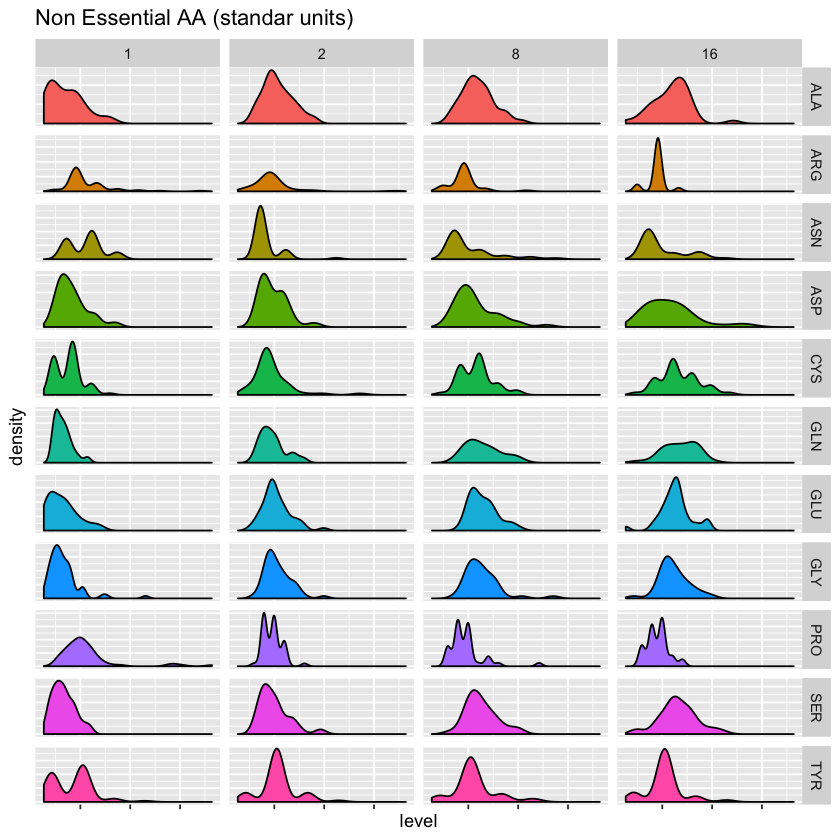

In [13]:
#png(filename="./plots/NEAA_dist.png", units="cm", width=15, height=20, res = 300)

AA_NE_Long_SU <- AA_NE_Long %>% group_by(AA) %>% mutate(level = (level - mean(level, na.rm = TRUE))/sd(level, na.rm = TRUE))

ggplot(AA_NE_Long_SU, aes(x = level, fill = AA)) + geom_density() + 
    guides(fill=FALSE) + 
    facet_grid(AA ~ week, scales = "free_y") +
    theme(
      #strip.background = element_blank(),
      axis.ticks.y = element_blank(),
      axis.text.y = element_blank(),
      axis.text.x = element_blank()
    ) + ggtitle('Non Essential AA (standar units)')

#dev.off()

In [14]:
AA_E_sum <- 
 AA_E_Long %>% group_by(week, AA) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) %>%
    mutate(mean = as.character(mean), sd = as.character(sd)) %>% 
    mutate(CI = paste(mean, '±', sd)) %>% 
    select(-mean, -sd) %>% 
    spread(week, CI)

AA_E_sum

AA,1,2,8,16
<chr>,<chr>,<chr>,<chr>,<chr>
HIS,1.43 ± 0.98,2.29 ± 0.85,2.23 ± 0.71,1.95 ± 0.57
ILE,0.45 ± 0.59,0.56 ± 0.54,0.74 ± 0.68,0.62 ± 0.49
LEU,1.38 ± 1,1.79 ± 1.09,2.15 ± 1.39,2.19 ± 1.7
LYS,2.55 ± 2.21,1.38 ± 0.98,1.36 ± 0.99,1.27 ± 0.56
MET,0.09 ± 0.29,0.1 ± 0.31,0.23 ± 0.48,0.16 ± 0.37
PHE,0.48 ± 0.5,1 ± 0.51,1.13 ± 0.52,1.03 ± 0.37
THR,5.08 ± 3.05,6.15 ± 2.63,6.31 ± 2.9,7.68 ± 3.64
TRP,0.03 ± 0.17,0 ± 0,0.03 ± 0.16,0 ± 0
VAL,2.38 ± 1.34,3.73 ± 1.09,4.54 ± 1.6,4.05 ± 1.39


In [15]:
dft <- AA_E_Long %>% group_by(week) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) %>% 
    mutate(mean = as.character(mean), sd = as.character(sd)) %>% mutate(CI = paste(mean, '±', sd)) %>% 
    select(-mean, -sd) %>% spread(week, CI) 

cbind(AA = 'Total', dft)
#rbind(AA_E_sum, cbind(AA = 'Total', dft))

AA,1,2,8,16
<fct>,<chr>,<chr>,<chr>,<chr>
Total,1.54 ± 2.09,1.89 ± 2.18,2.08 ± 2.36,2.11 ± 2.71


In [16]:
AA_NE_sum <- 
 AA_NE_Long %>% group_by(week, AA) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) %>%
    mutate(mean = as.character(mean), sd = as.character(sd)) %>% 
    mutate(CI = paste(mean, '±', sd)) %>% 
    select(-mean, -sd) %>% 
    spread(week, CI)

AA_NE_sum

AA,1,2,8,16
<chr>,<chr>,<chr>,<chr>,<chr>
ALA,12.12 ± 9.02,20.98 ± 7.65,24 ± 8.15,24.11 ± 9.67
ARG,1.54 ± 1.15,1.12 ± 1.06,1 ± 0.69,0.95 ± 0.4
ASN,0.75 ± 0.66,0.21 ± 0.54,0.62 ± 1.02,0.54 ± 0.87
ASP,2.66 ± 2.15,3.69 ± 1.98,4.92 ± 3.06,5.03 ± 3.7
CYS,0.77 ± 0.7,1.27 ± 1.01,1.85 ± 0.87,2.3 ± 1.08
GLN,12.6 ± 10.68,31.42 ± 15.85,51.95 ± 21.76,56.05 ± 21.17
GLU,44.92 ± 33.93,89.46 ± 31.81,118.28 ± 31.19,114.84 ± 35.95
GLY,5.03 ± 4.07,10.12 ± 3.38,12.74 ± 4.46,12.24 ± 3.85
PRO,3.6 ± 2.82,2.81 ± 0.91,2.77 ± 1.68,2.54 ± 1.04


In [17]:
dft <- AA_NE_Long %>% group_by(week) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) %>% 
    mutate(mean = as.character(mean), sd = as.character(sd)) %>% mutate(CI = paste(mean, '±', sd)) %>% 
    select(-mean, -sd) %>% spread(week, CI) 

cbind(AA = 'Total', dft)
#rbind(AA_NE_sum, cbind(AA = 'Total', dft))

AA,1,2,8,16
<fct>,<chr>,<chr>,<chr>,<chr>
Total,8.11 ± 16.62,15.52 ± 27.51,20.99 ± 36.07,21.08 ± 35.97


In [18]:
dft <- rbind(AA_E_Long, AA_NE_Long) %>% group_by(week) %>% 
    summarize(mean = mean(level, na.rm = TRUE), sd = sd(level, na.rm = TRUE))%>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) %>% 
    mutate(mean = as.character(mean), sd = as.character(sd)) %>% mutate(CI = paste(mean, '±', sd)) %>% 
    select(-mean, -sd) %>% spread(week, CI) 

cbind(AA = 'Total', dft)

AA,1,2,8,16
<fct>,<chr>,<chr>,<chr>,<chr>
Total,5.16 ± 12.83,9.38 ± 21.54,12.48 ± 28.39,12.54 ± 28.34


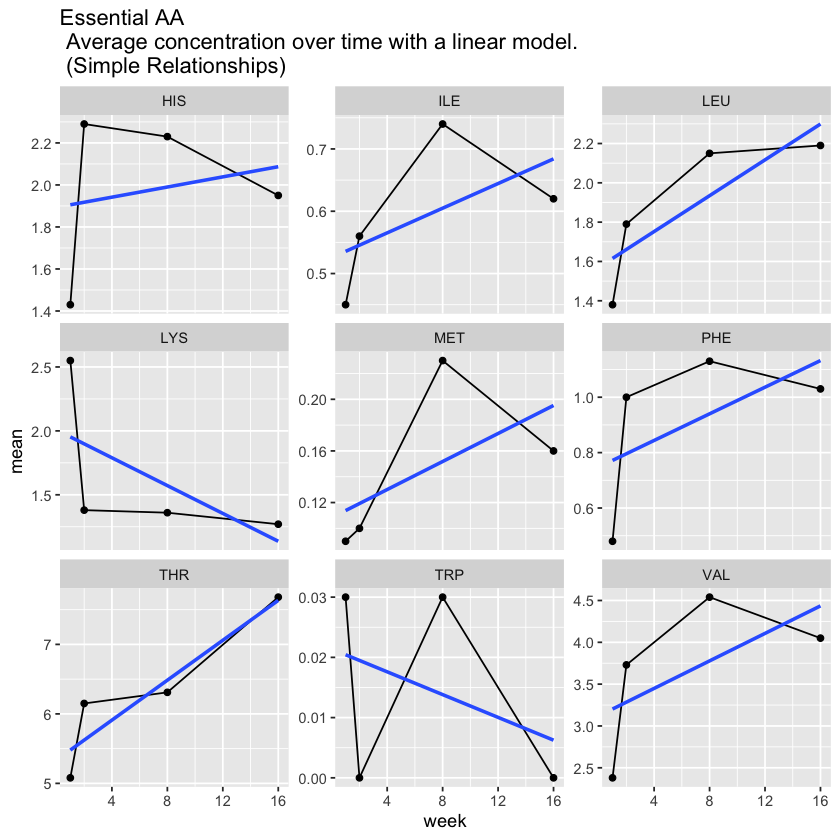

In [67]:
AA_E_mean_plot <- 
 AA_E_Long %>% group_by(week, AA) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) 

ggplot(AA_E_mean_plot, aes(x = week, y = mean)) + 
    geom_point() + geom_line() + 
    #geom_pointrange( aes(ymin = mean - sd, ymax = mean + sd)) + 
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = F) +
    ggtitle('Essential AA \n Average concentration over time with a linear model. \n (Simple Relationships)')

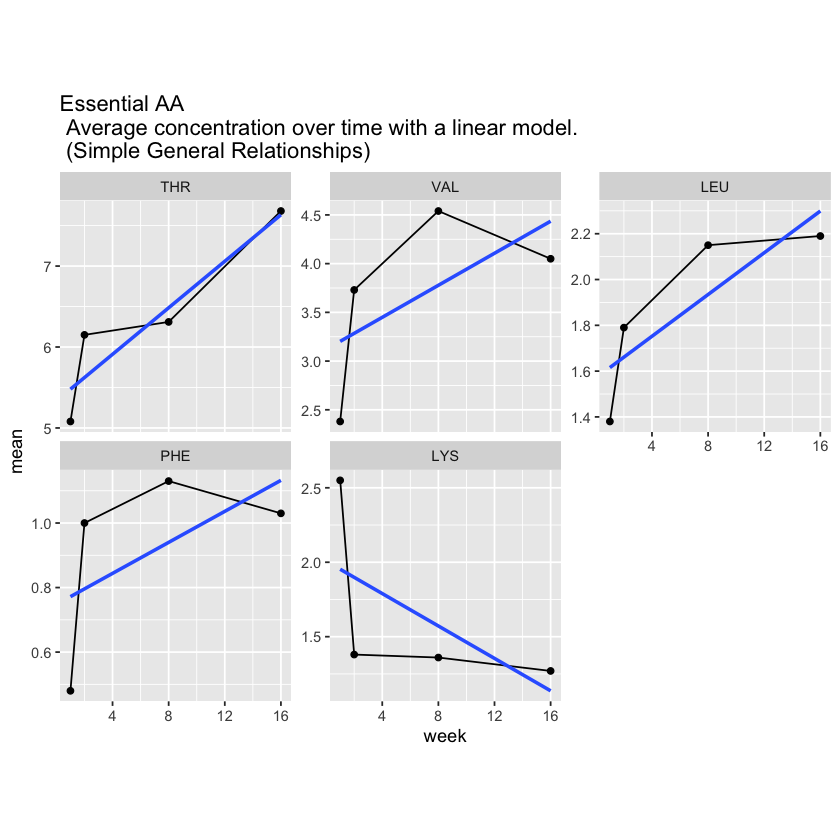

In [68]:
# THR, VAL, LEU, PHE, LYS
E_SIMPLE <- AA_E_mean_plot %>% filter(AA == 'THR' | AA == 'VAL' | AA == 'LEU' | AA == 'PHE' | AA == 'LYS') %>%
                mutate(AA = factor(AA, levels = c('THR', 'VAL', 'LEU', 'PHE', 'LYS')))

#png(filename="./plots/EAA_simple.png", units="cm", width=20, height=20, res = 300)
ggplot(E_SIMPLE, aes(x = week, y = mean)) + 
    geom_point() + geom_line() + 
    #geom_pointrange( aes(ymin = mean - sd, ymax = mean + sd)) + 
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = F) +
    theme(aspect.ratio = 1) +
    ggtitle('Essential AA \n Average concentration over time with a linear model. \n (Simple General Relationships)')
#dev.off()

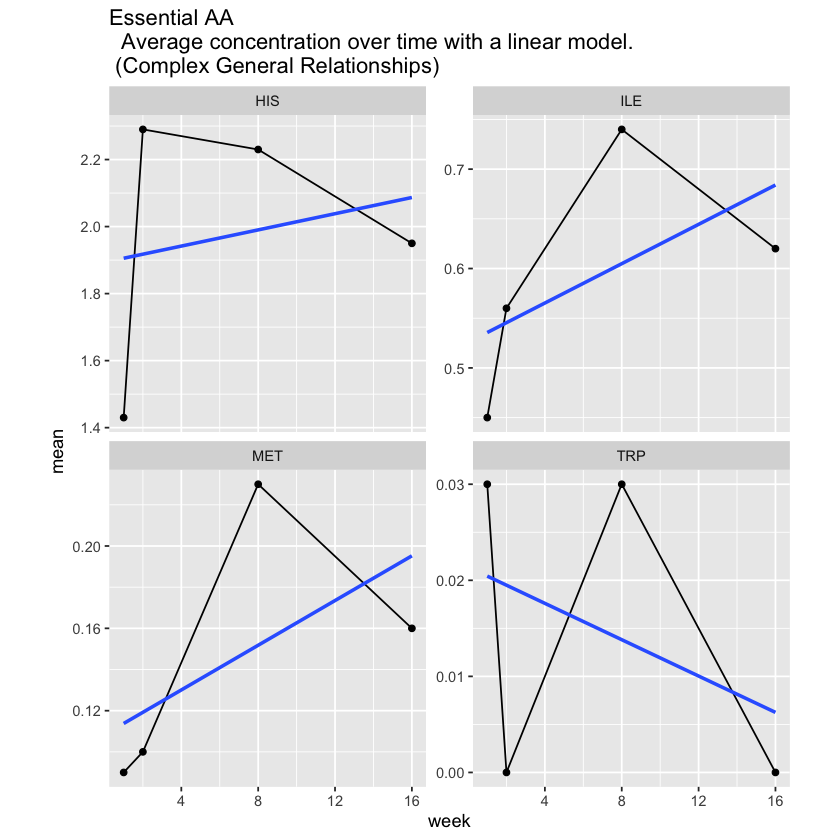

In [69]:
# HIS, 'ILE', 'MET', 'TRP'
E_COMPLEX <- AA_E_mean_plot %>% filter(AA == 'HIS' | AA == 'ILE' | AA == 'MET' | AA == 'TRP') %>%
            mutate(AA = factor(AA, levels=c('HIS', 'ILE', 'MET', 'TRP')))

#png(filename="./plots/EAA_complex.png", units="cm", width=20, height=20, res = 300)
ggplot(E_COMPLEX, aes(x = week, y = mean)) + 
    geom_point() + geom_line() + 
    #geom_pointrange( aes(ymin = mean - sd, ymax = mean + sd)) + 
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = F) +
    theme(aspect.ratio = 1) +
    ggtitle('Essential AA \n  Average concentration over time with a linear model. \n (Complex General Relationships)')
#dev.off()

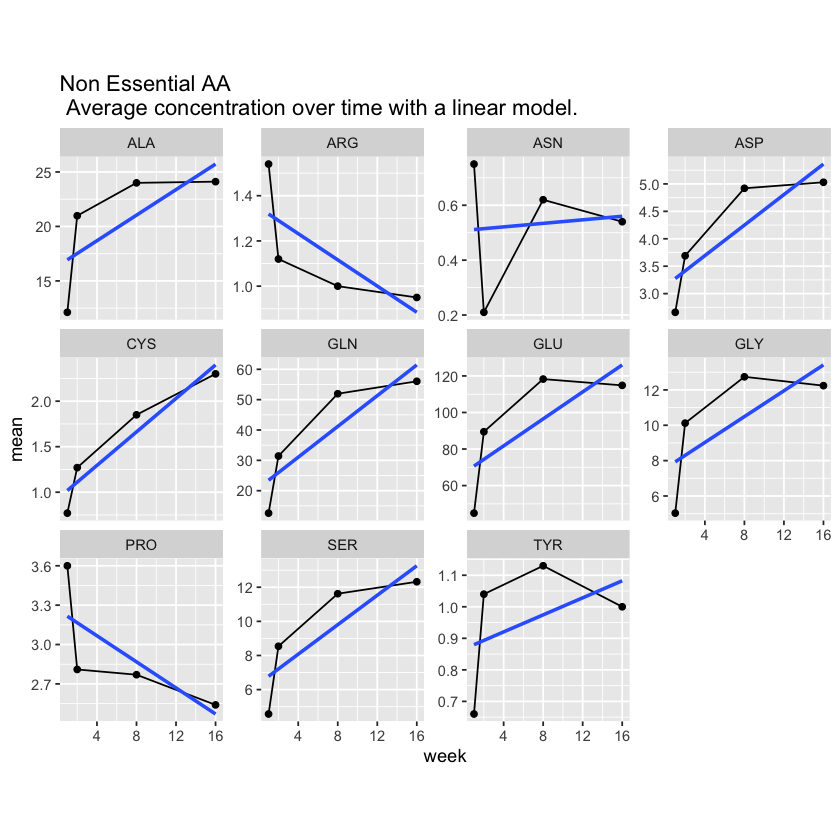

In [70]:
AA_NE_mean_plot <- 
 AA_NE_Long %>% group_by(week, AA) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) 

ggplot(AA_NE_mean_plot, aes(x = week, y = mean)) + 
    geom_point() + geom_line() +
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = FALSE) +
    theme(aspect.ratio = 1) + 
    ggtitle('Non Essential AA \n Average concentration over time with a linear model.')

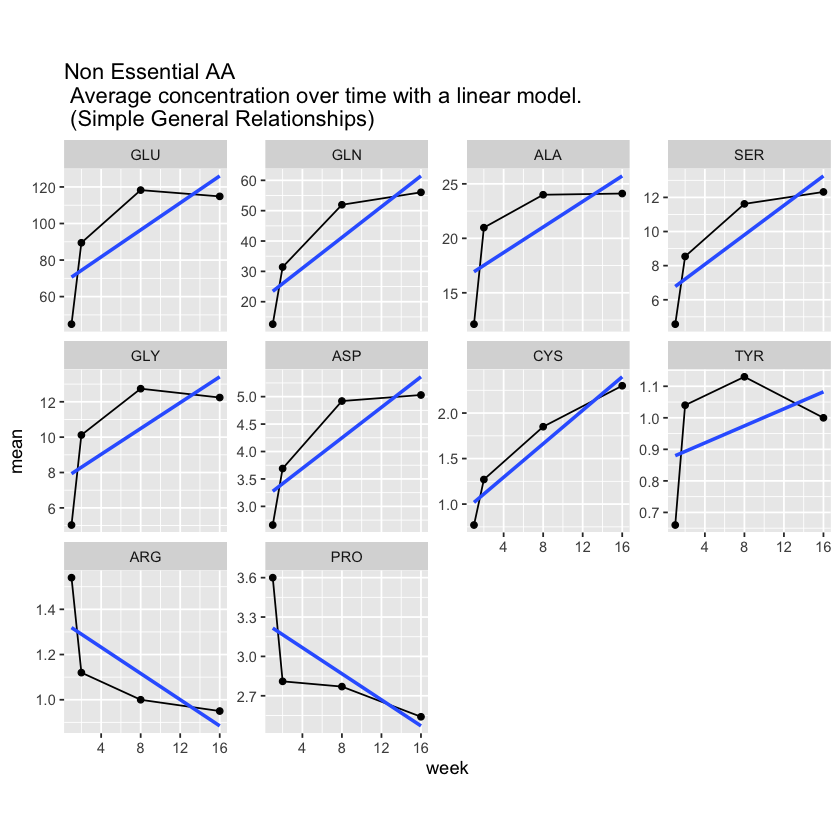

In [71]:
# GLU, GLN, ALA, SER, GLY, ASP, CYS, TYR, ARG, PRO
NE_SIMPLE <- AA_NE_mean_plot %>% 
    filter(AA == 'GLU' | AA == 'GLN' | AA == 'ALA' | AA == 'SER' | 
           AA == 'GLY' | AA == 'ASP' | AA == 'GLY' | AA == 'ASP' | 
           AA == 'CYS' | AA == 'TYR' | AA == 'ARG' | AA == 'PRO') %>% 
    mutate(AA = factor(AA, levels=c('GLU', 'GLN', 'ALA', 'SER', 'GLY', 'ASP', 'CYS', 'TYR', 'ARG', 'PRO')))
               
#png(filename="./plots/NEAA_simple.png", units="cm", width=20, height=20, res = 300)
ggplot(NE_SIMPLE, aes(x = week, y = mean)) + 
    geom_point() + geom_line() + 
    #geom_pointrange( aes(ymin = mean - sd, ymax = mean + sd)) + 
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = F) +
    theme(aspect.ratio = 1) +
    ggtitle('Non Essential AA \n Average concentration over time with a linear model. \n (Simple General Relationships)')
#dev.off()

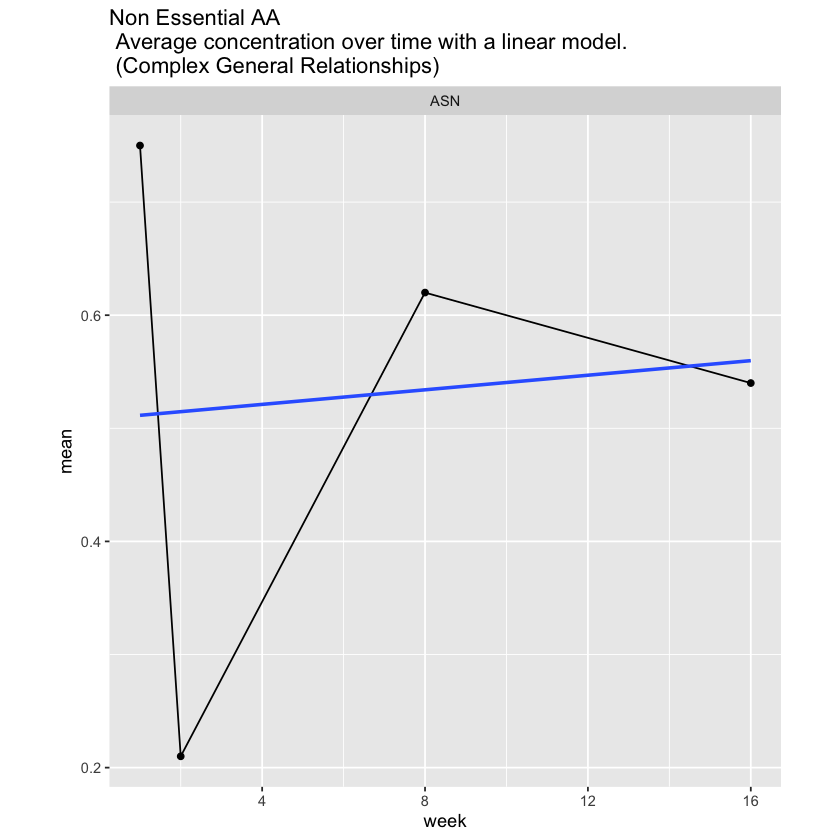

In [72]:
# ASN
NE_COMPLEX <- AA_NE_mean_plot %>% filter(AA == 'ASN')

#png(filename="./plots/NEAA_complex.png", units="cm", width=20, height=20, res = 300)
ggplot(NE_COMPLEX, aes(x = week, y = mean)) + 
    geom_point() + geom_line() + 
    #geom_pointrange( aes(ymin = mean - sd, ymax = mean + sd)) + 
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = F) +
    theme(aspect.ratio = 1) +
    ggtitle('Non Essential AA \n Average concentration over time with a linear model. \n (Complex General Relationships)')
#dev.off()

## Sex and Free AA levels:

http://felixhaass.de/dataviz_ggplot2/session4.html


In [73]:
library(broom.mixed)

In [74]:
AA_E_Nested <- AA_E_Long %>% group_by(AA) %>% nest()
AA_NE_Nested <- AA_NE_Long %>% group_by(AA) %>% nest()

In [75]:
meSex <- function(df){
    
    me <- lmer(level ~ sex + week + (1 | id), data = df)
    
    return(me)
}

In [76]:
nAA_E <- length(AA_E_Nested$AA)
nAA_NE <- length(AA_NE_Nested$AA)

In [77]:
me_E <- list()
tidy_E <- list()

for(i in 1:nAA_E){
    
    me_E[[i]] <- meSex(AA_E_Nested$data[[i]])
    tidy_E[[i]] <- tidy(me_E[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
    
}

boundary (singular) fit: see ?isSingular


In [78]:
?isSingular

In [79]:
me_NE <- list()
tidy_NE <- list()

for(j in 1:nAA_NE) {
    me_NE[[j]] <- meSex(AA_NE_Nested$data[[j]])
    tidy_NE[[j]] <- tidy(me_NE[[j]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[j])
}

In [80]:
AA_E_Nested <- AA_E_Nested %>% mutate(model = me_E, tidy = tidy_E)
AA_NE_Nested <- AA_NE_Nested %>% mutate(model = me_NE, tidy = tidy_NE)

In [81]:
me_E[[1]]
AA_E_Nested$tidy[[1]]

Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + week + (1 | id)
   Data: df
REML criterion at convergence: 484.086
Random effects:
 Groups   Name        Std.Dev.
 id       (Intercept) 0.2793  
 Residual             0.8445  
Number of obs: 183, groups:  id, 61
Fixed Effects:
(Intercept)       sexboy         week  
    1.73261      0.18010      0.01551  

effect,term,estimate,std.error,statistic,AA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
fixed,(Intercept),1.73260738,0.12840773,13.493015,HIS
fixed,sexboy,0.18009511,0.14783142,1.218246,HIS
fixed,week,0.01550525,0.01091728,1.420248,HIS


In [82]:
sexCoef_E <- bind_rows(tidy_E) %>% filter(grepl("sexboy", term))
sexCoef_NE <- bind_rows(tidy_NE) %>% filter(grepl("sexboy", term))

sexCoef_E
sexCoef_NE

effect,term,estimate,std.error,statistic,AA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
fixed,sexboy,0.18009511,0.14783142,1.2182465,HIS
fixed,sexboy,0.08909543,0.10494380,0.8489823,ILE
fixed,sexboy,0.03872305,0.19775311,0.1958151,LEU
fixed,sexboy,0.17976498,0.21885111,0.8214031,LYS
fixed,sexboy,0.06183345,0.05528159,1.1185179,MET
fixed,sexboy,0.11793047,0.08011753,1.4719684,PHE
fixed,sexboy,-0.70135843,0.61254574,-1.1449895,THR
fixed,sexboy,-0.00338907,0.01566710,-0.2163177,TRP
fixed,sexboy,0.26116772,0.24902207,1.0487734,VAL


effect,term,estimate,std.error,statistic,AA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
fixed,sexboy,0.14263751,0.1522882,0.9366285,ARG
fixed,sexboy,0.54756968,0.4801045,1.1405219,ASP
fixed,sexboy,1.61818930,1.6590414,0.9753761,ALA
fixed,sexboy,-0.08339889,0.1257034,-0.6634576,ASN
fixed,sexboy,0.35682776,0.1635167,2.1822096,CYS
fixed,sexboy,1.81908239,0.7897730,2.3032978,GLY
fixed,sexboy,14.39755180,6.5220682,2.2075132,GLU
fixed,sexboy,3.06094539,3.3877643,0.9035296,GLN
fixed,sexboy,0.38692513,0.3436295,1.1259951,PRO


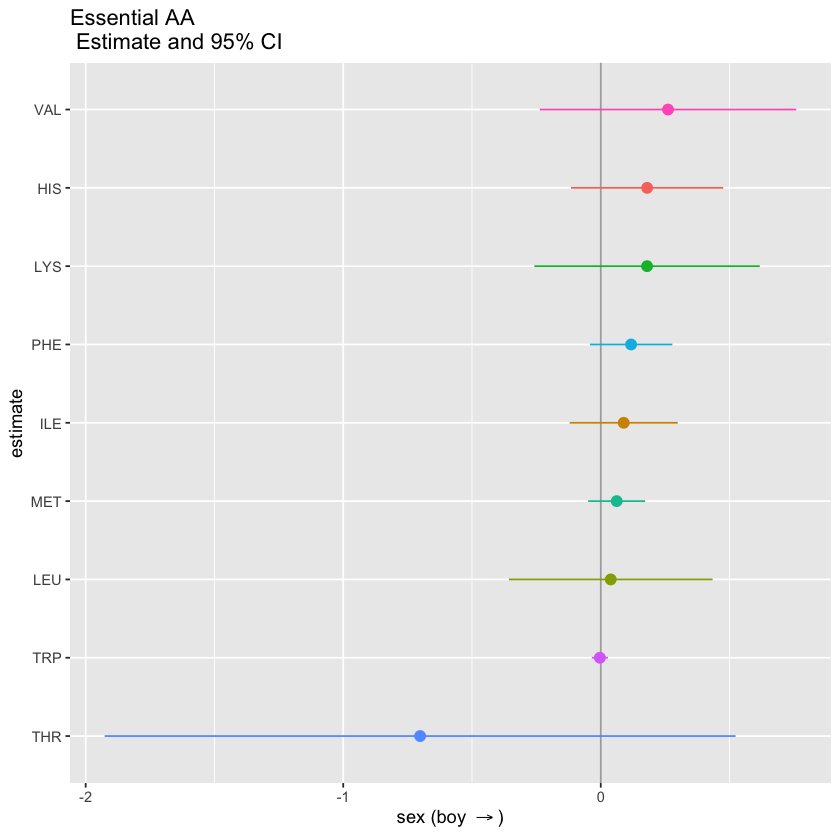

In [83]:
#png(filename="./plots/EAA_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Essential AA \n Estimate and 95% CI') + xlab('estimate') + ylab(TeX('sex (boy $\\rightarrow$)'))   
#dev.off()

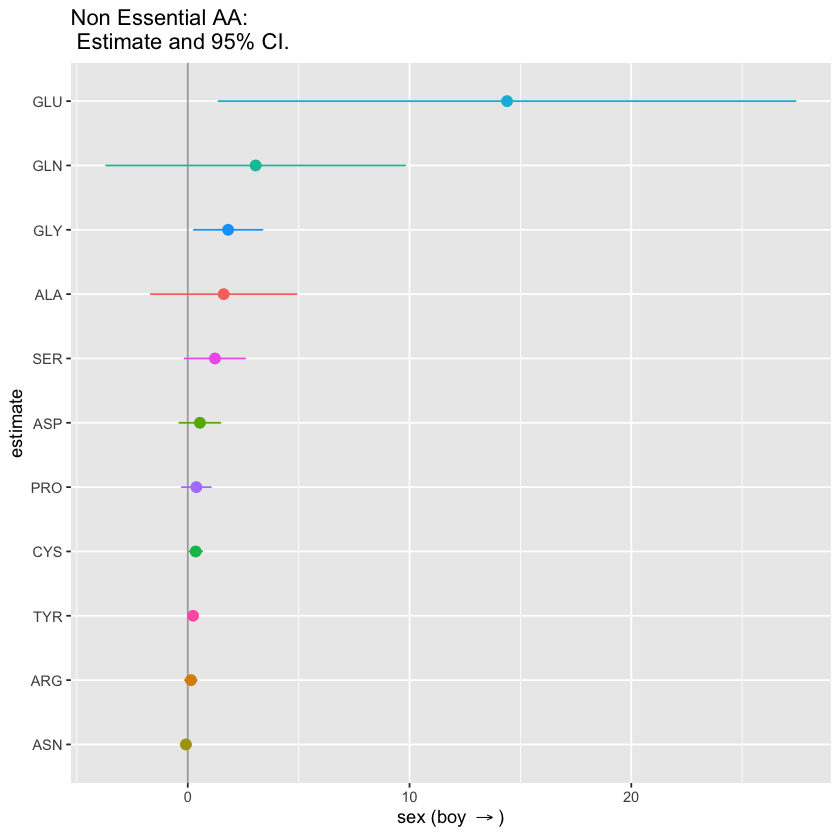

In [84]:
#png(filename="./plots/NEAA_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") +
    coord_flip() +
    ggtitle('Non Essential AA: \n Estimate and 95% CI.') +  xlab('estimate') + ylab(TeX('sex (boy $\\rightarrow$)')) 
#dev.off()

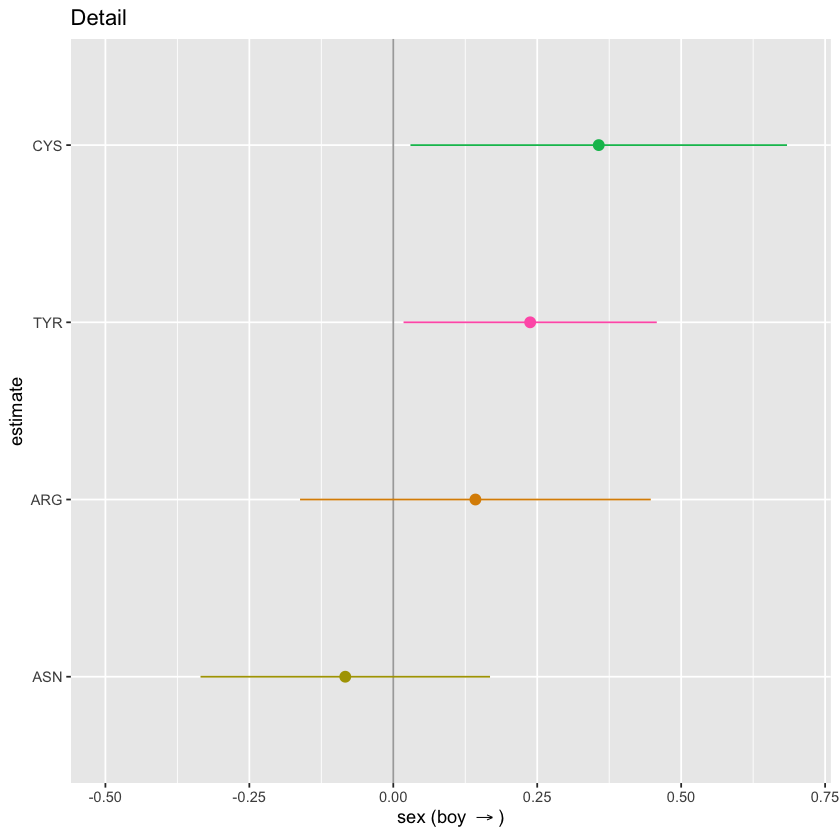

In [85]:
#png(filename="./plots/NEAA_coeff_detail.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip(ylim = c(-0.5, 0.7), xlim = c(1, 4)) +  
    ggtitle('Detail') + xlab('estimate') + ylab(TeX('sex (boy $\\rightarrow$)')) 
#dev.off()


In [86]:
AA_NE_Long %>% group_by(id) %>% summarise(TAA = mean(level, na.rm = T)) %>% head()

id,TAA
<fct>,<dbl>
1,14.477273
2,17.409091
3,16.045455
4,5.818182
5,4.000000
6,13.909091


In [87]:
weekCoef_E <- bind_rows(tidy_E) %>% filter(grepl("week", term))
weekCoef_NE <- bind_rows(tidy_NE) %>% filter(grepl("week", term))

weekCoef_E
weekCoef_NE

effect,term,estimate,std.error,statistic,AA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
fixed,week,0.0155052457,0.010917283,1.4202477,HIS
fixed,week,0.0133510720,0.006676275,1.9997787,ILE
fixed,week,0.0497045109,0.016096316,3.0879433,LEU
fixed,week,-0.0537753502,0.016430852,-3.2728278,LYS
fixed,week,0.0065908317,0.004543971,1.4504564,MET
fixed,week,0.0272732216,0.006733246,4.0505308,PHE
fixed,week,0.1310249700,0.031598542,4.1465511,THR
fixed,week,-0.0004120271,0.001340103,-0.3074593,TRP
fixed,week,0.0943042851,0.017936935,5.2575473,VAL


effect,term,estimate,std.error,statistic,AA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
fixed,week,-0.0256058452,0.010165582,-2.51887658,ARG
fixed,week,0.1506534186,0.031530443,4.77803052,ASP
fixed,week,0.6432946534,0.109616643,5.86858561,ALA
fixed,week,-0.0007231438,0.010046331,-0.07198089,ASN
fixed,week,0.0954215677,0.010469964,9.11383912,CYS
fixed,week,0.4108440229,0.053088740,7.73881657,GLY
fixed,week,4.0793697194,0.452598364,9.01322242,GLU
fixed,week,2.6781209805,0.224747115,11.91615287,GLN
fixed,week,-0.0536342181,0.023582439,-2.27432872,PRO


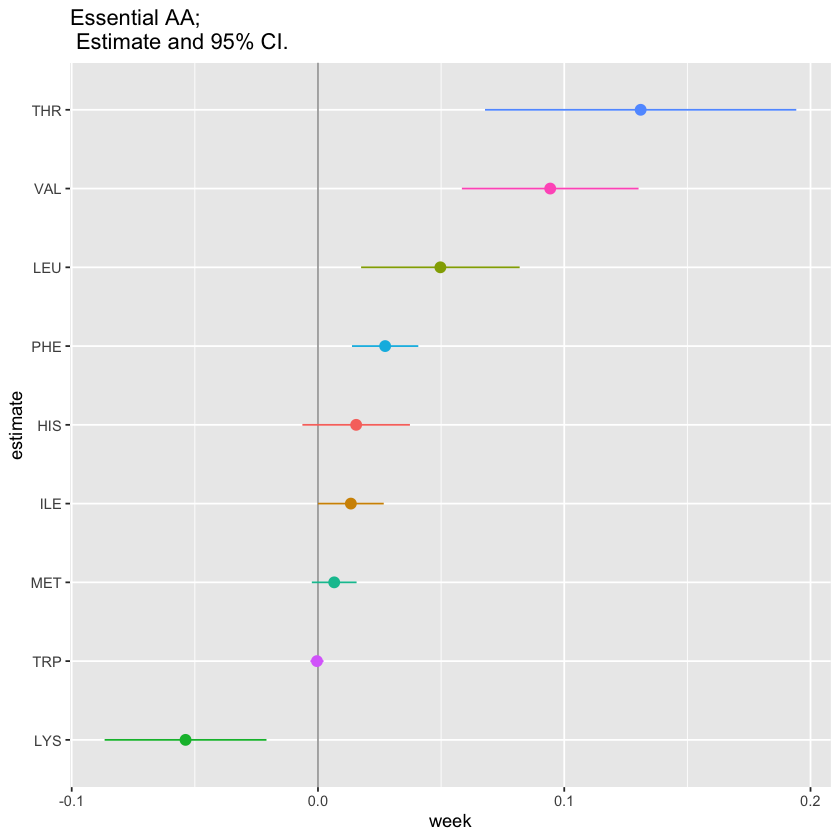

In [88]:
#png(filename="./plots/EAA_week_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(weekCoef_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") +
    coord_flip() +
    ggtitle('Essential AA; \n Estimate and 95% CI.') +  xlab('estimate') + ylab('week') 
#dev.off()

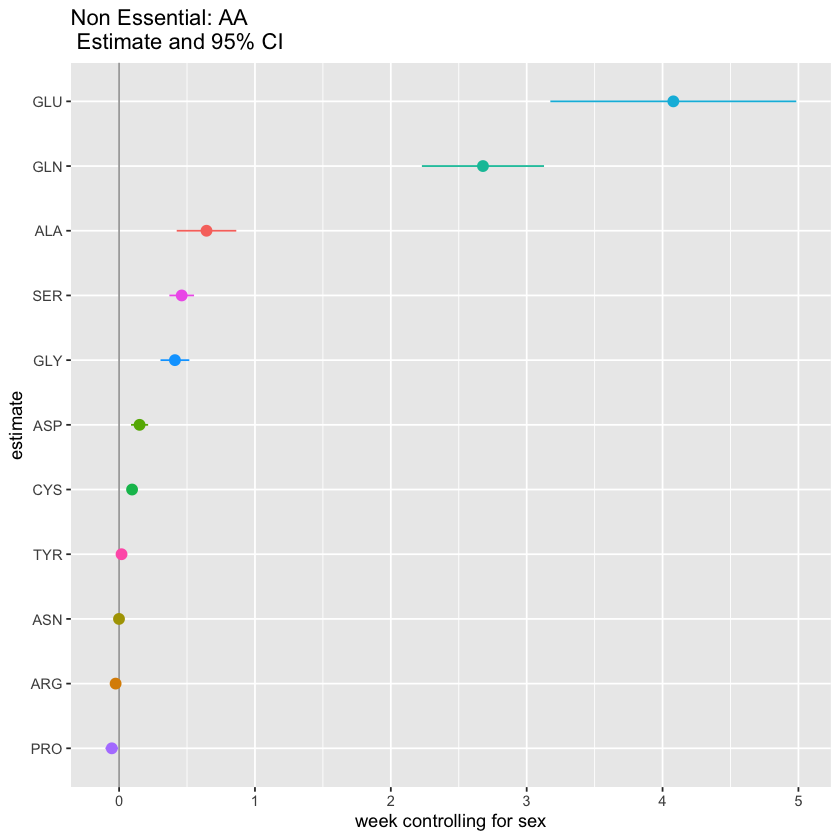

In [89]:
#png(filename="./plots/NEAA_week_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(weekCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") +
    coord_flip() +
    ggtitle('Non Essential: AA \n Estimate and 95% CI') +  xlab('estimate') + ylab('week controlling for sex') 
#dev.off()

## Sex-Week interaction and Free AA

$$
\begin{align*}
AA &= \alpha_0 + \alpha_1 \ sex + \alpha_2 \ week + \alpha_3 \ sex \times week + \alpha_{id} \\
   &= \alpha_0 + \alpha_1 \ sex + \left( \alpha_2 + \alpha_3 \ sex \right) \times week + \alpha_{id} \\
   &= \alpha_0 + \left( \alpha_1 + \alpha_3 \ week \right) \times \ sex +  \alpha_2 \ week + \alpha_{id}
\end{align*}
$$

In [90]:
meSexWeek <- function(df){
    
    me <- lmer(level ~ sex + week + sex:week + (1 | id), data = df)
    
    return(me)
}

In [91]:
me_E_SW <- list()
tidy_E_SW <- list()

for(i in 1:nAA_E){
    
    me_E_SW[[i]] <- meSexWeek(AA_E_Nested$data[[i]])
    covMat_E <- vcov(me_E_SW[[i]])
    tidy_E_SW[[i]] <- tidy(me_E_SW[[i]], effects = 'fixed') %>% 
        mutate(AA = AA_E_Nested$AA[i], var_W = covMat_E[3, 3], var_SW = covMat_E[4, 4], cov_SW = covMat_E[3, 4])
   
}

boundary (singular) fit: see ?isSingular


In [92]:
me_NE_SW <- list()
tidy_NE_SW <- list()

for(i in 1:nAA_NE){
    
    me_NE_SW[[i]] <- meSexWeek(AA_NE_Nested$data[[i]])
    covMat_NE <- vcov(me_NE_SW[[i]])
    tidy_NE_SW[[i]] <- tidy(me_NE_SW[[i]], effects = 'fixed') %>% 
        mutate(AA = AA_NE_Nested$AA[i], var_W = covMat_NE[3, 3], var_SW = covMat_NE[4, 4], cov_SW = covMat_NE[3, 4])

}

In [93]:
vcov(me_E_SW[[1]])

4 x 4 Matrix of class "dpoMatrix"
             (Intercept)       sexboy          week   sexboy:week
(Intercept)  0.021393435 -0.021393435 -0.0015330833  0.0015330833
sexboy      -0.021393435  0.037314717  0.0015330833 -0.0027327074
week        -0.001533083  0.001533083  0.0002670666 -0.0002670666
sexboy:week  0.001533083 -0.002732707 -0.0002670666  0.0004846460

In [94]:
AA_E_Nested <- AA_E_Nested %>% mutate(model_SW = me_E_SW, tidy_SW = tidy_E_SW)
AA_NE_Nested <- AA_NE_Nested %>% mutate(model_SW = me_NE_SW, tidy_SW = tidy_NE_SW)

In [95]:
AA_E_Nested$model_SW[1]
AA_E_Nested$tidy_SW[1]

[[1]]
Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + week + sex:week + (1 | id)
   Data: df
REML criterion at convergence: 489.7939
Random effects:
 Groups   Name        Std.Dev.
 id       (Intercept) 0.2782  
 Residual             0.8472  
Number of obs: 183, groups:  id, 61
Fixed Effects:
(Intercept)       sexboy         week  sexboy:week  
   1.753438     0.143093     0.011896     0.006564  


effect,term,estimate,std.error,statistic,AA,var_W,var_SW,cov_SW
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
fixed,(Intercept),1.753438064,0.14626495,11.9880947,HIS,0.0002670666,0.000484646,-0.0002670666
fixed,sexboy,0.143092634,0.19317018,0.7407594,HIS,0.0002670666,0.000484646,-0.0002670666
fixed,week,0.011896126,0.01634217,0.7279404,HIS,0.0002670666,0.000484646,-0.0002670666
fixed,sexboy:week,0.006563502,0.02201468,0.2981421,HIS,0.0002670666,0.000484646,-0.0002670666


In [96]:
df1_E <- bind_rows(tidy_E_SW) %>% filter(grepl("^week$", term))
df2_E <- bind_rows(tidy_E_SW) %>% filter(grepl("^sexboy:week$", term))

left_join(df1_E, df2_E, by = c('AA', 'effect'))

effect,term.x,estimate.x,std.error.x,statistic.x,AA,var_W.x,var_SW.x,cov_SW.x,term.y,estimate.y,std.error.y,statistic.y,var_W.y,var_SW.y,cov_SW.y
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fixed,week,0.0118961264,0.016342172,0.7279404,HIS,2.670666e-04,4.846460e-04,-2.670666e-04,sexboy:week,0.006563502,0.022014676,0.29814213,2.670666e-04,4.846460e-04,-2.670666e-04
fixed,week,0.0218973491,0.009945470,2.2017409,ILE,9.891238e-05,1.802144e-04,-9.891238e-05,sexboy:week,-0.015593924,0.013424397,-1.16161073,9.891238e-05,1.802144e-04,-9.891238e-05
fixed,week,0.0506114225,0.024153214,2.0954322,LEU,5.833777e-04,1.055268e-03,-5.833777e-04,sexboy:week,-0.001675822,0.032484883,-0.05158774,5.833777e-04,1.055268e-03,-5.833777e-04
fixed,week,-0.0313407464,0.024544828,-1.2768778,LYS,6.024486e-04,1.092493e-03,-6.024486e-04,sexboy:week,-0.040870014,0.033052885,-1.23650368,6.024486e-04,1.092493e-03,-6.024486e-04
fixed,week,0.0073141173,0.006819873,1.0724712,MET,4.651067e-05,8.410353e-05,-4.651067e-05,sexboy:week,-0.001314011,0.009170798,-0.14328213,4.651067e-05,8.410353e-05,-4.651067e-05
fixed,week,0.0310360073,0.010139766,3.0608210,PHE,1.028148e-04,1.849938e-04,-1.028148e-04,sexboy:week,-0.006803428,0.013601242,-0.50020635,1.028148e-04,1.849938e-04,-1.028148e-04
fixed,week,0.1512439807,0.047073027,3.2129649,THR,2.215870e-03,4.054503e-03,-2.215870e-03,sexboy:week,-0.036877777,0.063674982,-0.57915645,2.215870e-03,4.054503e-03,-2.215870e-03
fixed,week,0.0007799286,0.002008098,0.3883916,TRP,4.032459e-06,7.282184e-06,-4.032459e-06,sexboy:week,-0.002152543,0.002698552,-0.79766576,4.032459e-06,7.282184e-06,-4.032459e-06
fixed,week,0.1026163854,0.026850696,3.8217402,VAL,7.209599e-04,1.309204e-03,-7.209599e-04,sexboy:week,-0.015064571,0.036182930,-0.41634468,7.209599e-04,1.309204e-03,-7.209599e-04


In [97]:
df1_E <- bind_rows(tidy_E_SW) %>% filter(grepl("^week$", term))
df2_E <- bind_rows(tidy_E_SW) %>% filter(grepl("^sexboy:week$", term))

sexCoef_E_SW <- left_join(df1_E, df2_E, by = c('AA', 'effect')) %>% 
            mutate(estimate_girl = estimate.x,
                   estimate_boy = estimate.x + estimate.y, 
                   std.error_boy = sqrt(var_W.x + var_SW.x + 2*cov_SW.x)) %>% 
            select(effect, AA, estimate_boy, std.error_boy, estimate_girl)

sexCoef_E_SW

effect,AA,estimate_boy,std.error_boy,estimate_girl
<chr>,<chr>,<dbl>,<dbl>,<dbl>
fixed,HIS,0.018459629,0.014750572,0.0118961264
fixed,ILE,0.006303426,0.009016765,0.0218973491
fixed,LEU,0.048935601,0.021723027,0.0506114225
fixed,LYS,-0.072210760,0.022136952,-0.0313407464
fixed,MET,0.006000106,0.006131302,0.0073141173
fixed,PHE,0.024232580,0.009065260,0.0310360073
fixed,THR,0.114366204,0.042879289,0.1512439807
fixed,TRP,-0.001372614,0.001802699,0.0007799286
fixed,VAL,0.087551815,0.024253754,0.1026163854


In [98]:
df1_NE <- bind_rows(tidy_NE_SW) %>% filter(grepl("^week$", term))
df2_NE <- bind_rows(tidy_NE_SW) %>% filter(grepl("^sexboy:week$", term))

sexCoef_NE_SW <- left_join(df1_NE, df2_NE, by = c('AA', 'effect')) %>% 
            mutate(estimate_girl = estimate.x,
                   estimate_boy = estimate.x + estimate.y, 
                   std.error_boy = sqrt(var_W.x + var_SW.x + 2*cov_SW.x)) %>% 
            select(effect, AA, estimate_boy, std.error_boy, estimate_girl)

sexCoef_NE_SW

effect,AA,estimate_boy,std.error_boy,estimate_girl
<chr>,<chr>,<dbl>,<dbl>,<dbl>
fixed,ARG,-0.039514820,0.013713784,-0.008931382
fixed,ASP,0.191335633,0.042293959,0.101209065
fixed,ALA,0.785458521,0.146877073,0.470434200
fixed,ASN,0.003399255,0.013547188,-0.005808657
fixed,CYS,0.107833530,0.014081245,0.080326062
fixed,GLY,0.428403222,0.071777215,0.389428512
fixed,GLU,4.392748008,0.610486602,3.696369484
fixed,GLN,2.778492223,0.303949898,2.555991338
fixed,PRO,-0.069070724,0.031874819,-0.034913860


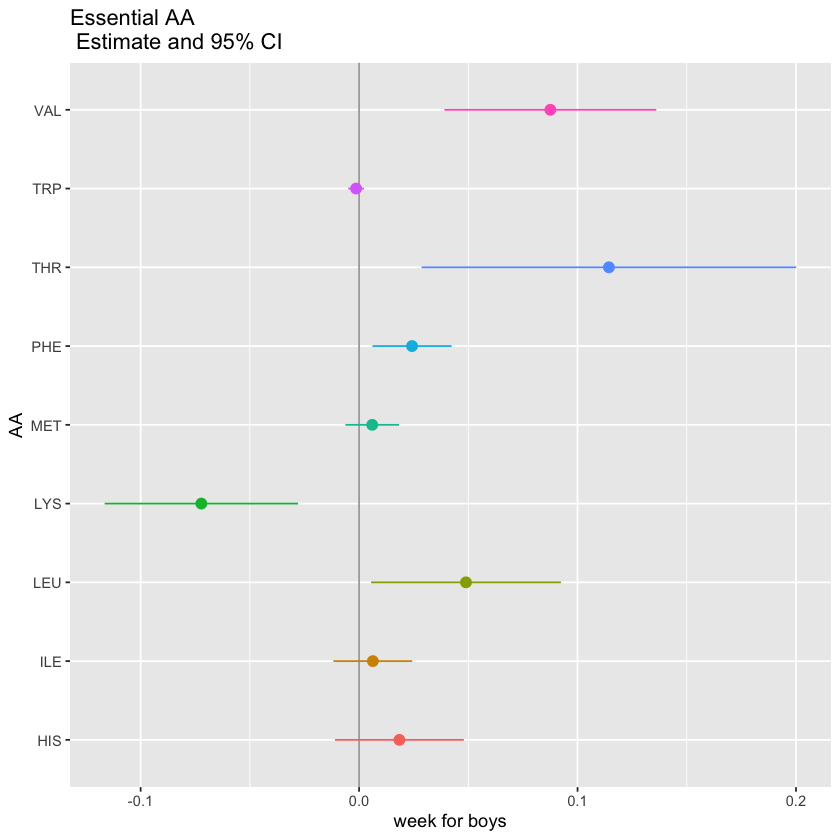

In [99]:
#png(filename="./plots/EAA_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_E_SW, aes(x = AA, y = estimate_boy, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate_boy - 2*std.error_boy, ymax = estimate_boy + 2*std.error_boy)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab('week for boys') + 
    ggtitle('Essential AA \n Estimate and 95% CI') 
#dev.off()

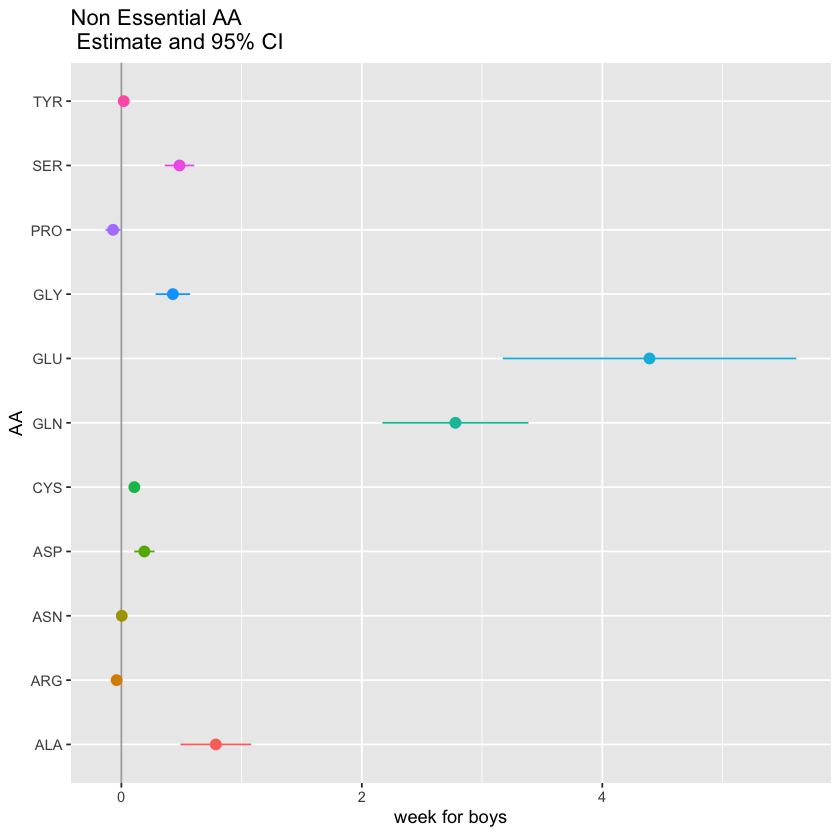

In [100]:
#png(filename="./plots/NEAA_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE_SW, aes(x = AA, y = estimate_boy, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate_boy - 2*std.error_boy, ymax = estimate_boy + 2*std.error_boy)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab(TeX('week for boys')) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI') 
#dev.off()

In [101]:
a_0_E <- bind_rows(tidy_E_SW) %>% filter(grepl("(Intercept)", term)) %>% 
                select(AA, estimate.a_0 = estimate, std.error.a_0 = std.error)
a_0_NE <- bind_rows(tidy_NE_SW) %>% filter(grepl("(Intercept)", term)) %>% 
                select(AA, estimate.a_0 = estimate, std.error.a_0 = std.error)

a_0_E 
a_0_NE 

AA,estimate.a_0,std.error.a_0
<chr>,<dbl>,<dbl>
HIS,1.753438064,0.14626495
ILE,0.394481886,0.09688867
LEU,1.506555130,0.20567606
LYS,1.784889599,0.21704758
MET,0.058953710,0.05780137
PHE,0.620540877,0.08537870
THR,5.663313035,0.53009894
TRP,0.008240932,0.01673621
VAL,2.754038339,0.24325533


AA,estimate.a_0,std.error.a_0
<chr>,<dbl>,<dbl>
ARG,1.1653868,0.1426091
ASP,2.9765403,0.4508441
ALA,15.6299040,1.5637160
ASN,0.6299833,0.1294562
CYS,0.7681782,0.1518533
GLY,6.0628496,0.7496030
GLU,55.8558795,6.2725985
GLN,17.8043882,3.1952381
PRO,3.0321843,0.3282142


In [102]:
ablines_E_SW <- left_join(sexCoef_E_SW, a_0_E, by = 'AA') %>% select(AA, estimate_boy, estimate_girl, estimate.a_0)
ablines_NE_SW <- left_join(sexCoef_NE_SW, a_0_NE, by = 'AA') %>% select(AA, estimate_boy, estimate_girl, estimate.a_0)

ablines_E_SW <- ablines_E_SW %>% gather(sex, estimate, 2:3)
ablines_NE_SW <- ablines_NE_SW %>% gather(sex, estimate, 2:3)

ablines_E_SW
ablines_NE_SW

AA,estimate.a_0,sex,estimate
<chr>,<dbl>,<chr>,<dbl>
HIS,1.753438064,estimate_boy,0.0184596288
ILE,0.394481886,estimate_boy,0.0063034255
LEU,1.506555130,estimate_boy,0.0489356009
LYS,1.784889599,estimate_boy,-0.0722107605
MET,0.058953710,estimate_boy,0.0060001059
PHE,0.620540877,estimate_boy,0.0242325797
THR,5.663313035,estimate_boy,0.1143662042
TRP,0.008240932,estimate_boy,-0.0013726141
VAL,2.754038339,estimate_boy,0.0875518147


AA,estimate.a_0,sex,estimate
<chr>,<dbl>,<chr>,<dbl>
ARG,1.1653868,estimate_boy,-0.039514820
ASP,2.9765403,estimate_boy,0.191335633
ALA,15.6299040,estimate_boy,0.785458521
ASN,0.6299833,estimate_boy,0.003399255
CYS,0.7681782,estimate_boy,0.107833530
GLY,6.0628496,estimate_boy,0.428403222
GLU,55.8558795,estimate_boy,4.392748008
GLN,17.8043882,estimate_boy,2.778492223
PRO,3.0321843,estimate_boy,-0.069070724


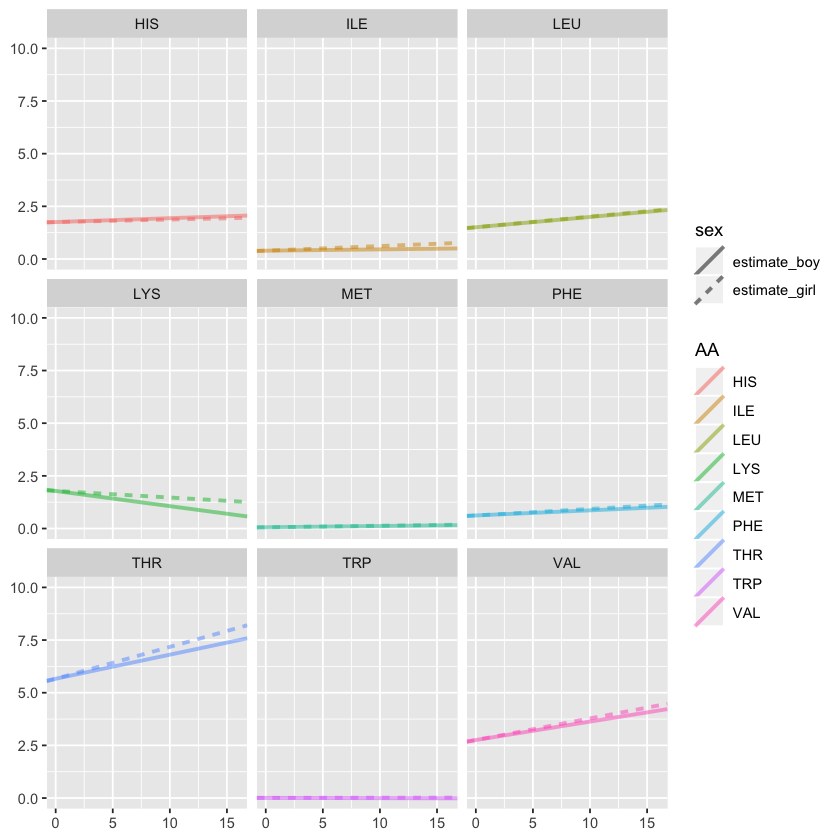

In [103]:
#png(filename="./plots/E_SW_trends.png", units="cm", width=20, height=20, res = 300)
ggplot() + 
    scale_x_continuous(limits=c(0, 16)) +
    scale_y_continuous(limits=c(0, 10)) + 
    geom_abline(data=ablines_E_SW, size = 1.1, alpha = 0.5,
                aes(slope = estimate, intercept = estimate.a_0, color = AA, linetype=sex)) + 
    facet_wrap(~AA)

#dev.off()

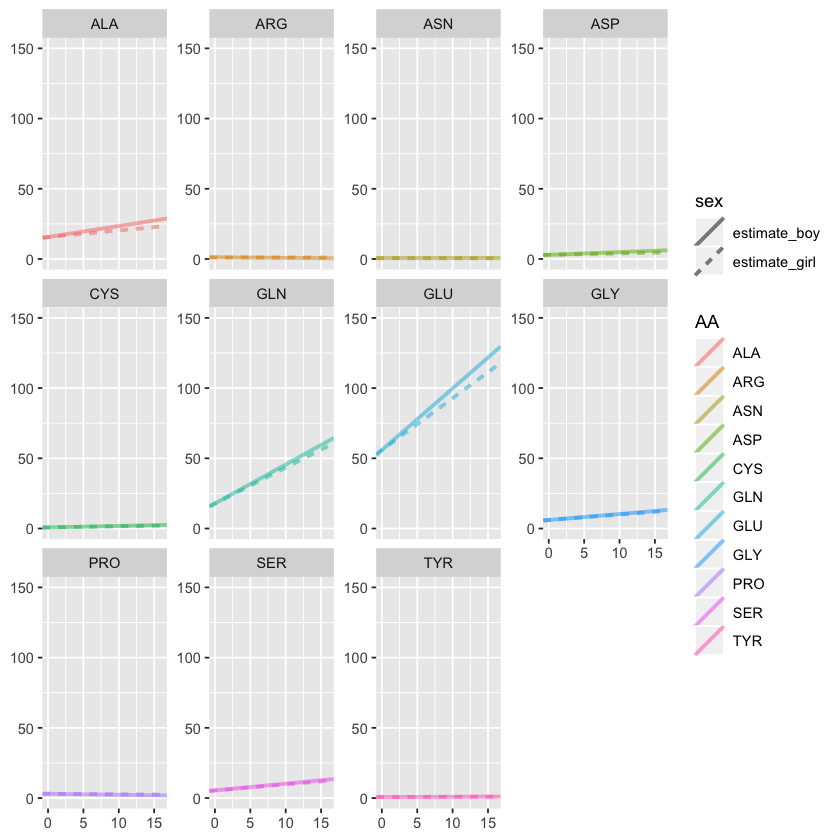

In [104]:
#png(filename="./plots/NE_SW_trends.png", units="cm", width=20, height=20, res = 300)
ggplot() + 
    scale_x_continuous(limits=c(0, 16)) +
    scale_y_continuous(limits=c(0, 150)) + 
    geom_abline(data=ablines_NE_SW, size = 1.1, alpha = 0.5,
                aes(slope = estimate, intercept = estimate.a_0, color = AA, linetype=sex)) + 
    facet_wrap(~AA, scales = "free_y")

#dev.off()

In [105]:
sexCoef_E_SW <- bind_rows(tidy_E_SW) %>% filter(grepl("^sexboy$", term)) %>% select(1:6)
sexCoef_NE_SW <- bind_rows(tidy_NE_SW) %>% filter(grepl("^sexboy$", term)) %>% select(1:6)

sexCoef_E_SW
sexCoef_NE_SW

effect,term,estimate,std.error,statistic,AA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
fixed,sexboy,0.143092634,0.19317018,0.7407594,HIS
fixed,sexboy,0.174595018,0.12794612,1.3645980,ILE
fixed,sexboy,0.047945394,0.27163690,0.1765054,LEU
fixed,sexboy,0.409603780,0.28665427,1.4289122,LYS
fixed,sexboy,0.069296902,0.07633820,0.9077618,MET
fixed,sexboy,0.156944143,0.11224622,1.3982132,PHE
fixed,sexboy,-0.505636613,0.69988127,-0.7224606,THR
fixed,sexboy,0.009034879,0.02210311,0.4087605,TRP
fixed,sexboy,0.345219059,0.32126058,1.0745765,VAL


effect,term,estimate,std.error,statistic,AA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
fixed,sexboy,0.31074934,0.1883314,1.65001387,ARG
fixed,sexboy,0.05185834,0.5953684,0.08710294,ASP
fixed,sexboy,-0.11682473,2.0649908,-0.05657397,ALA
fixed,sexboy,-0.13598403,0.1709737,-0.79535070,ASN
fixed,sexboy,0.20510859,0.2005285,1.02284025,CYS
fixed,sexboy,1.60275402,0.9899288,1.61905984,GLY
fixed,sexboy,10.52145458,8.2838069,1.27012312,GLU
fixed,sexboy,1.82734425,4.2196043,0.43306057,GLN
fixed,sexboy,0.57680676,0.4334495,1.33073566,PRO


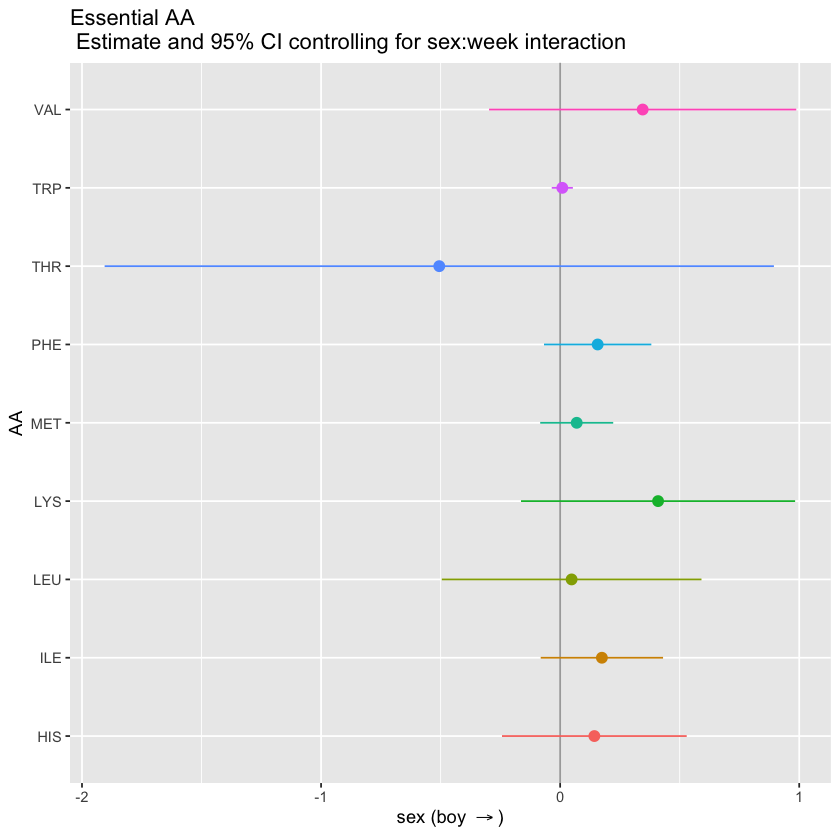

In [106]:
#png(filename="./plots/EAA_S_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_E_SW, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab(TeX('sex (boy $\\rightarrow$)')) + 
    ggtitle('Essential AA \n Estimate and 95% CI controlling for sex:week interaction') 
#dev.off()

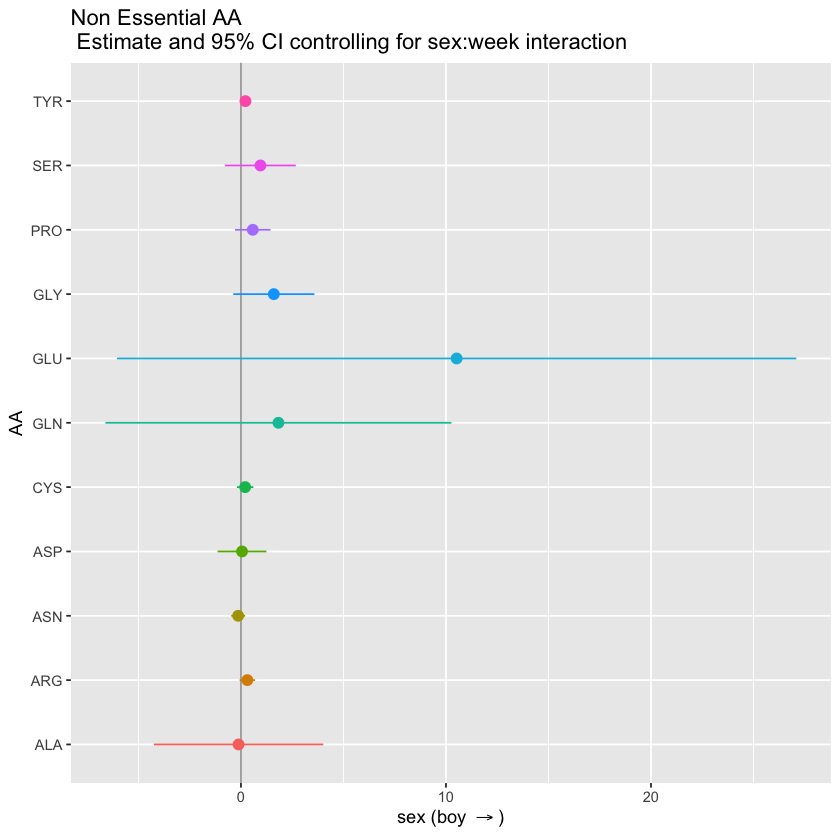

In [107]:
#png(filename="./plots/NEAA_S_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE_SW, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab(TeX('sex (boy $\\rightarrow$)')) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI controlling for sex:week interaction') 
#dev.off()

In [108]:
swCoef_E_SW <- bind_rows(tidy_E_SW) %>% filter(grepl("^sexboy:week$", term)) %>% select(1:6)
swCoef_NE_SW <- bind_rows(tidy_NE_SW) %>% filter(grepl("^sexboy:week$", term)) %>% select(1:6)

swCoef_E_SW
swCoef_NE_SW

effect,term,estimate,std.error,statistic,AA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
fixed,sexboy:week,0.006563502,0.022014676,0.29814213,HIS
fixed,sexboy:week,-0.015593924,0.013424397,-1.16161073,ILE
fixed,sexboy:week,-0.001675822,0.032484883,-0.05158774,LEU
fixed,sexboy:week,-0.040870014,0.033052885,-1.23650368,LYS
fixed,sexboy:week,-0.001314011,0.009170798,-0.14328213,MET
fixed,sexboy:week,-0.006803428,0.013601242,-0.50020635,PHE
fixed,sexboy:week,-0.036877777,0.063674982,-0.57915645,THR
fixed,sexboy:week,-0.002152543,0.002698552,-0.79766576,TRP
fixed,sexboy:week,-0.015064571,0.036182930,-0.41634468,VAL


effect,term,estimate,std.error,statistic,AA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
fixed,sexboy:week,-0.030583438,0.02043535,-1.4965946,ARG
fixed,sexboy:week,0.090126568,0.06298104,1.4310110,ASP
fixed,sexboy:week,0.315024321,0.21872555,1.4402721,ALA
fixed,sexboy:week,0.009207913,0.02024972,0.4547180,ASN
fixed,sexboy:week,0.027507469,0.02096268,1.3122113,CYS
fixed,sexboy:week,0.038974709,0.10694446,0.3644388,GLY
fixed,sexboy:week,0.696378524,0.91003229,0.7652240,GLU
fixed,sexboy:week,0.222500885,0.45278705,0.4914029,GLN
fixed,sexboy:week,-0.034156864,0.04751160,-0.7189163,PRO


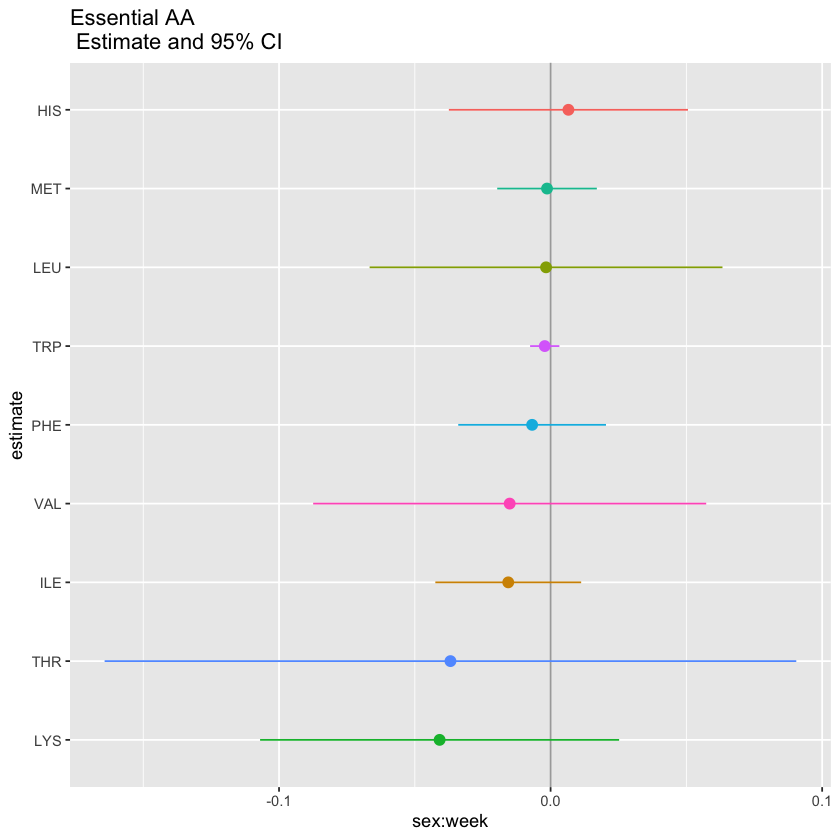

In [109]:
#png(filename="./plots/EAA_SW_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(swCoef_E_SW, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Essential AA \n Estimate and 95% CI') + ylab('sex:week') + xlab('estimate')
#dev.off()

In [110]:
AA_E_mean_plot_SEX <- 
 AA_E_Long %>% filter(!is.na(sex)) %>% group_by(week, sex, AA) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) 

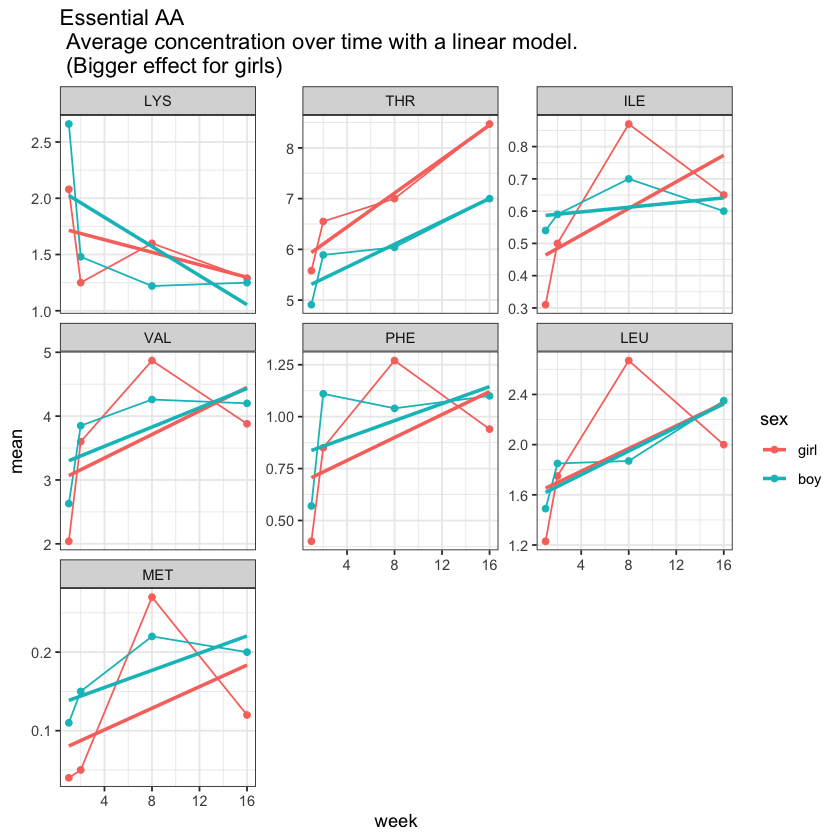

In [111]:
E_GIRLS <- AA_E_mean_plot_SEX %>% 
                filter(AA == 'THR' | AA == 'VAL' | AA == 'LEU' | AA == 'PHE' | 
                       AA == 'LYS' | AA == 'ILE' | AA == 'MET') %>%
                mutate(AA = factor(AA, levels = c('LYS', 'THR', 'ILE', 'VAL', 'PHE', 'LEU', 'MET')))

#png(filename="./plots/EAA_girls.png", units="cm", width=20, height=20, res = 300)
ggplot(E_GIRLS, aes(x = week, y = mean, color = sex)) + 
    geom_point() + geom_line() +
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = FALSE) +
    theme(aspect.ratio = 1) +
    theme_bw() +
    ggtitle('Essential AA \n Average concentration over time with a linear model. \n (Bigger effect for girls)')
#dev.off()

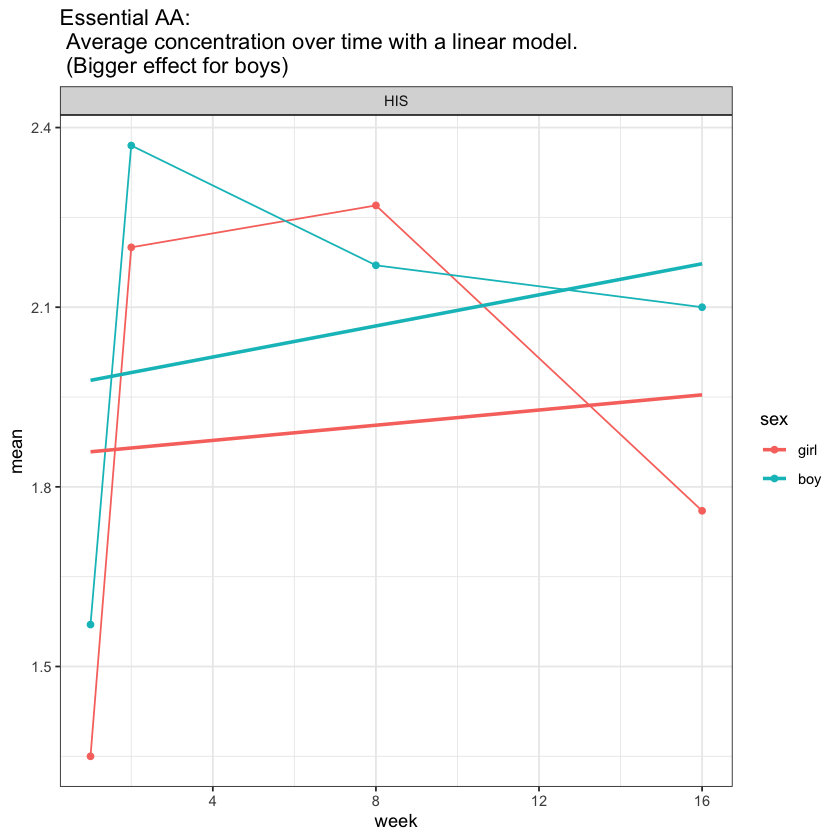

In [113]:
E_BOYS <- AA_E_mean_plot_SEX %>% filter(AA == 'HIS') 

#png(filename="./plots/EAA_boys.png", units="cm", width=20, height=20, res = 300)
ggplot(E_BOYS, aes(x = week, y = mean, color = sex)) + 
    geom_point() + geom_line() +
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = FALSE) +
    theme(aspect.ratio = 1) + 
    theme_bw() +
    ggtitle('Essential AA: \n Average concentration over time with a linear model. \n (Bigger effect for boys)')
#dev.off()

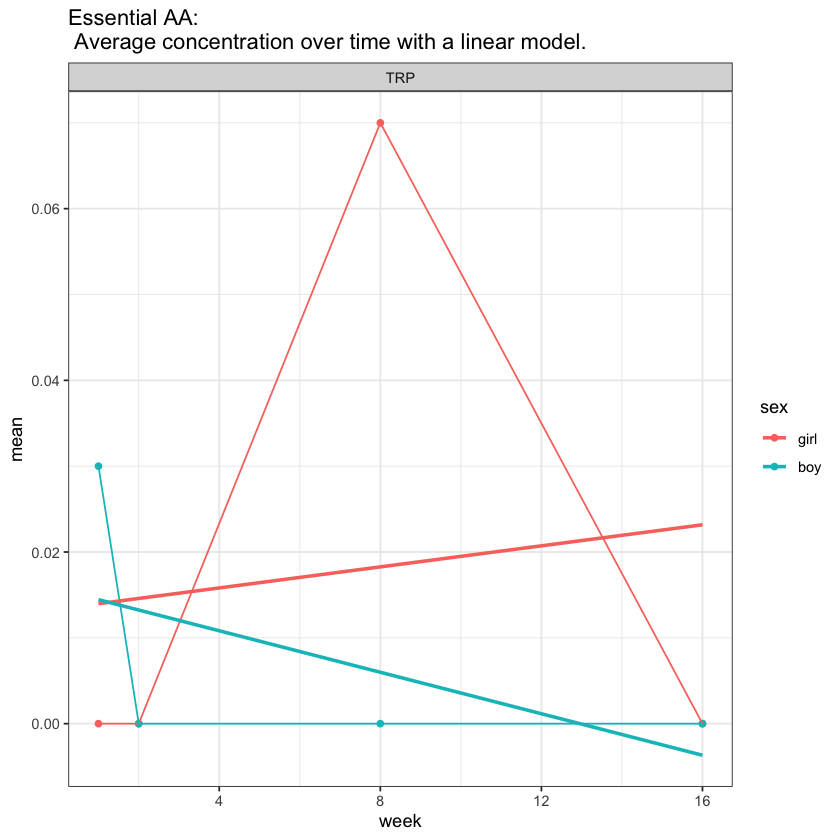

In [114]:
E_TRP <- AA_E_mean_plot_SEX %>% filter(AA == 'TRP') 

#png(filename="./plots/EAA_TRP.png", units="cm", width=20, height=20, res = 300)
ggplot(E_TRP, aes(x = week, y = mean, color = sex)) + 
    geom_point() + geom_line() +
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = FALSE) +
    theme(aspect.ratio = 1) + 
    theme_bw() +
    ggtitle('Essential AA: \n Average concentration over time with a linear model.')
#dev.off()

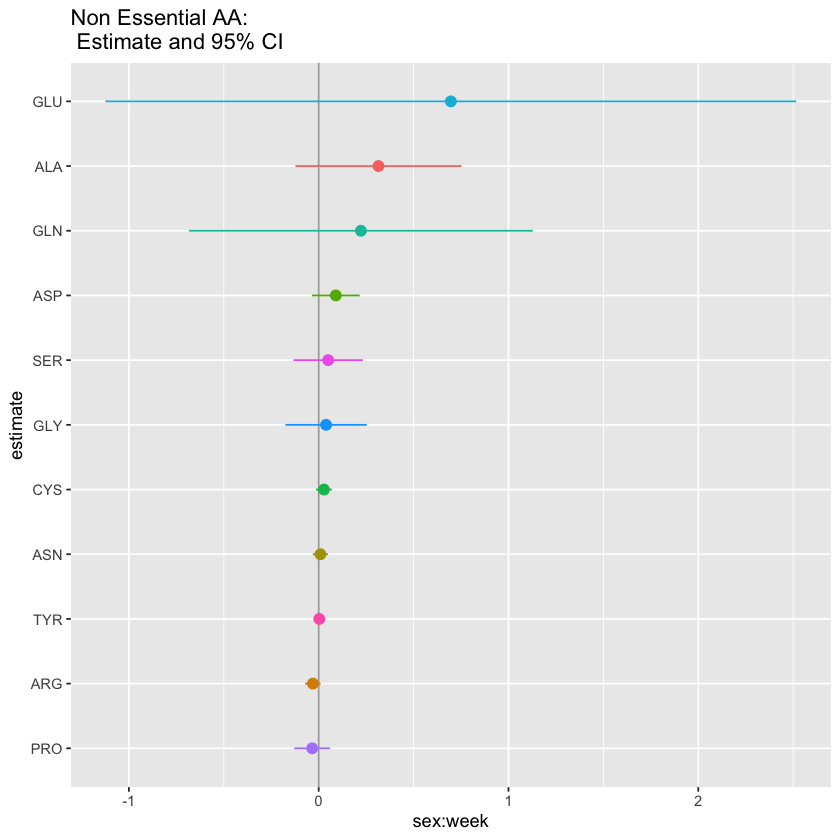

In [115]:
#png(filename="./plots/NEAA_SW_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(swCoef_NE_SW, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Non Essential AA: \n Estimate and 95% CI') + ylab('sex:week') + xlab('estimate') 
#dev.off()

In [116]:
AA_NE_mean_plot_SEX <- 
 AA_NE_Long %>% filter(!is.na(sex)) %>% group_by(week, sex, AA) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) 

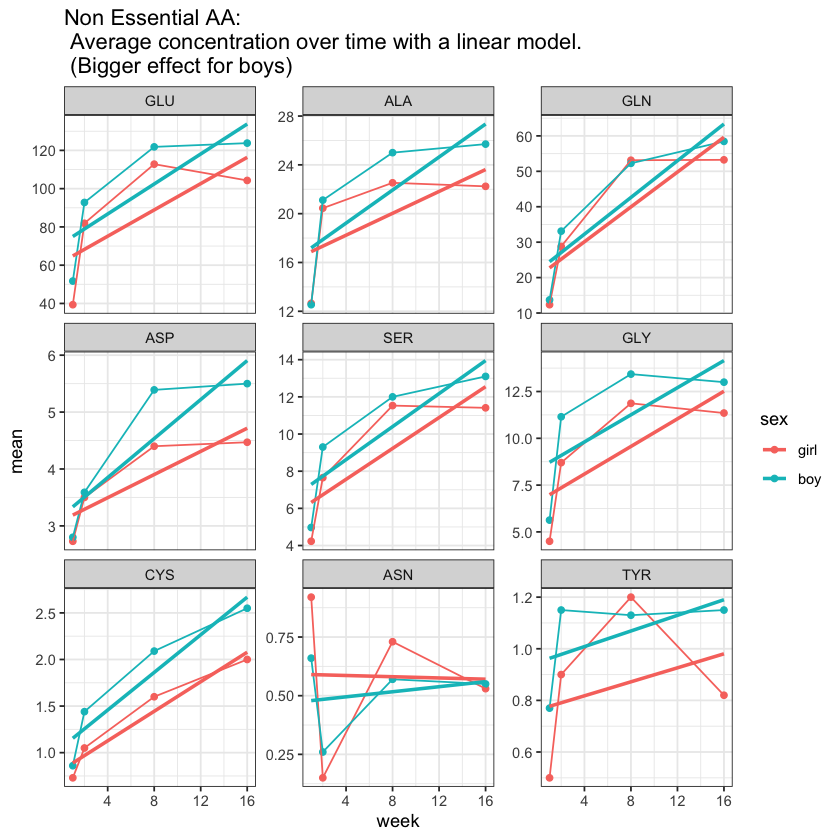

In [117]:
E_BOYS <- AA_NE_mean_plot_SEX %>% 
                filter(AA == 'GLU' | AA == 'ALA' | AA == 'GLN' | AA == 'ASP' | 
                       AA == 'SER' | AA == 'GLY' | AA == 'CYS' | AA == 'ASN' | AA == 'TYR') %>%
                mutate(AA = factor(AA, levels = c('GLU', 'ALA', 'GLN', 'ASP', 'SER', 'GLY', 'CYS', 'ASN', 'TYR')))

#png(filename="./plots/NEAA_boys.png", units="cm", width=20, height=20, res = 300)
ggplot(E_BOYS, aes(x = week, y = mean, color = sex)) + 
    geom_point() + geom_line() +
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = FALSE) +
    theme(aspect.ratio = 1) +
    theme_bw() +
    ggtitle('Non Essential AA: \n Average concentration over time with a linear model. \n (Bigger effect for boys)')
#dev.off()

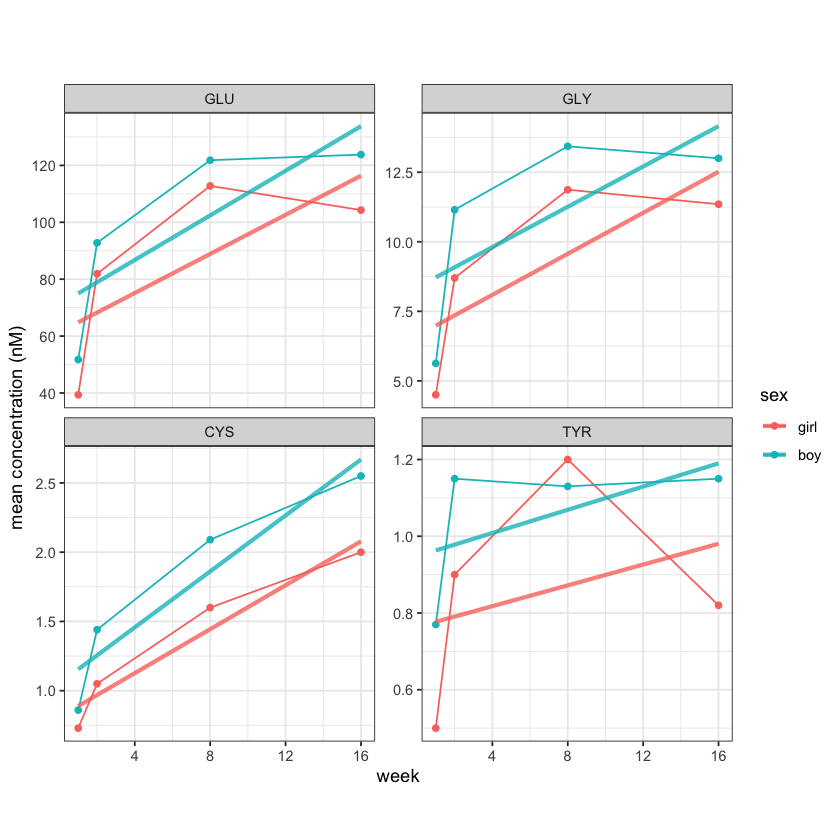

In [119]:
E_SIG <- AA_NE_mean_plot_SEX %>% 
                filter(AA == 'GLU' | AA == 'GLY' | AA == 'CYS' | AA == 'TYR') %>%
                mutate(AA = factor(AA, levels = c('GLU', 'GLY', 'CYS', 'TYR')))

#png(filename="./plots/plot2.png", units="cm", width=20, height=20, res = 300)
ggplot(E_SIG, aes(x = week, y = mean, color = sex)) + 
    geom_point() + geom_line() +
    facet_wrap(~AA,  scales = "free_y") + 
    geom_line(stat="smooth", method = lm, se = FALSE, alpha = 0.8, size = 1.2) +
    theme_bw() +
    theme(aspect.ratio = 0.95) +
    ggtitle('') + ylab('mean concentration (nM)')
#dev.off()

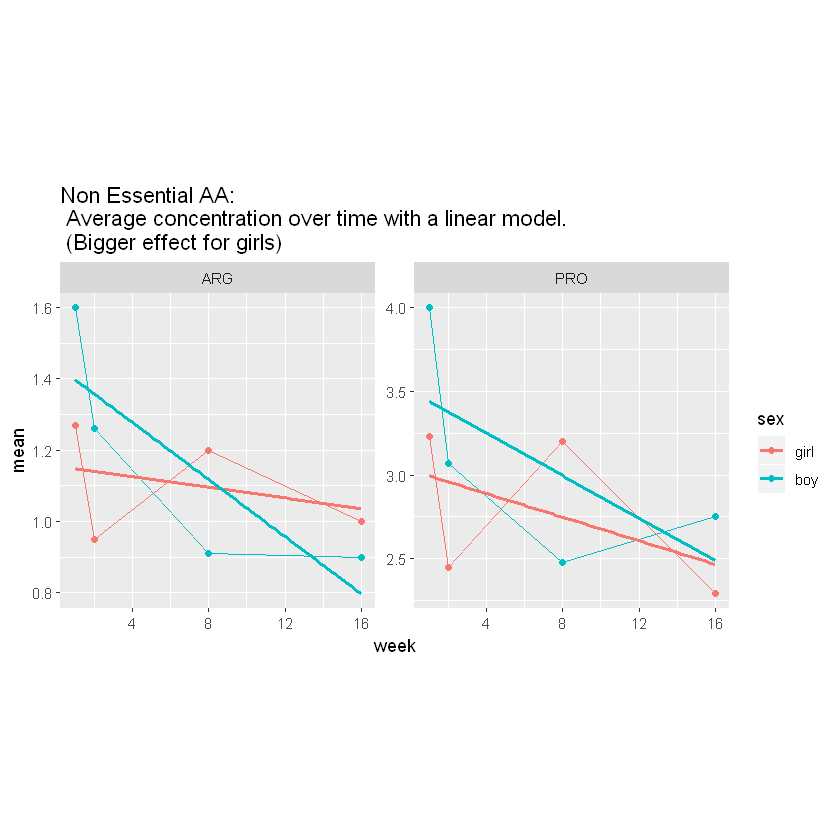

In [68]:
E_GIRLS <- AA_NE_mean_plot_SEX %>% 
                filter(AA == 'ARG' | AA == 'PRO') %>%
                mutate(AA = factor(AA, levels = c('ARG', 'PRO')))

#png(filename="./plots/NEAA_girls.png", units="cm", width=20, height=20, res = 300)
ggplot(E_GIRLS, aes(x = week, y = mean, color = sex)) + 
    geom_point() + geom_line() +
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = FALSE) +
    theme(aspect.ratio = 1) + 
    ggtitle('Non Essential AA: \n Average concentration over time with a linear model. \n (Bigger effect for girls)')
#dev.off()

## Week and Free AA



In [69]:
meWeek <- function(df){
    
    me <- lmer(level ~ week + (1 | id), data = df)
    
    return(me)
}

In [70]:
me_E_W <- list()
tidy_E_W <- list()

for(i in 1:nAA_E){
    
    me_E_W[[i]] <- meWeek(AA_E_Nested$data[[i]])
    tidy_E_W[[i]] <- tidy(me_E_W[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
   
}

In [71]:
me_NE_W <- list()
tidy_NE_W <- list()

for(i in 1:nAA_NE){
    
    me_NE_W[[i]] <- meWeek(AA_NE_Nested$data[[i]])
    tidy_NE_W[[i]] <- tidy(me_NE_W[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])

}

In [72]:
AA_E_Nested <- AA_E_Nested %>% mutate(model_W = me_E_W, tidy_W = tidy_E_W)
AA_NE_Nested <- AA_NE_Nested %>% mutate(model_W = me_NE_W, tidy_W = tidy_NE_W)

In [73]:
weekCoef_E <- bind_rows(tidy_E_W) %>% filter(grepl("week", term))
weekCoef_NE <- bind_rows(tidy_NE_W) %>% filter(grepl("week", term))

weekCoef_E
weekCoef_NE

effect,term,estimate,std.error,statistic,AA
fixed,week,0.018738164,0.010967849,1.708463,HIS
fixed,week,0.012731132,0.006733172,1.890807,ILE
fixed,week,0.049856423,0.015917927,3.132093,LEU
fixed,week,-0.059342986,0.018348179,-3.234271,LYS
fixed,week,0.006077201,0.004517861,1.345150,MET
fixed,week,0.028363731,0.006709344,4.227497,PHE
fixed,week,0.133049683,0.031251708,4.257357,THR
fixed,week,-0.001109411,0.001590644,-0.697460,TRP
fixed,week,0.096704532,0.018141917,5.330447,VAL


effect,term,estimate,std.error,statistic,AA
fixed,week,-0.0284400853,0.010809657,-2.630989,ARG
fixed,week,0.1510887926,0.032073629,4.710686,ASP
fixed,week,0.6653476156,0.109949524,6.051391,ALA
fixed,week,-0.0004539237,0.009832637,-0.046165,ASN
fixed,week,0.0958404519,0.010378179,9.234805,CYS
fixed,week,0.4175892468,0.052746777,7.916868,GLY
fixed,week,4.1506857471,0.461582247,8.992299,GLU
fixed,week,2.7038227854,0.222554713,12.149025,GLN
fixed,week,-0.0519788025,0.023221897,-2.238353,PRO
fixed,week,0.4639072569,0.044848180,10.343948,SER


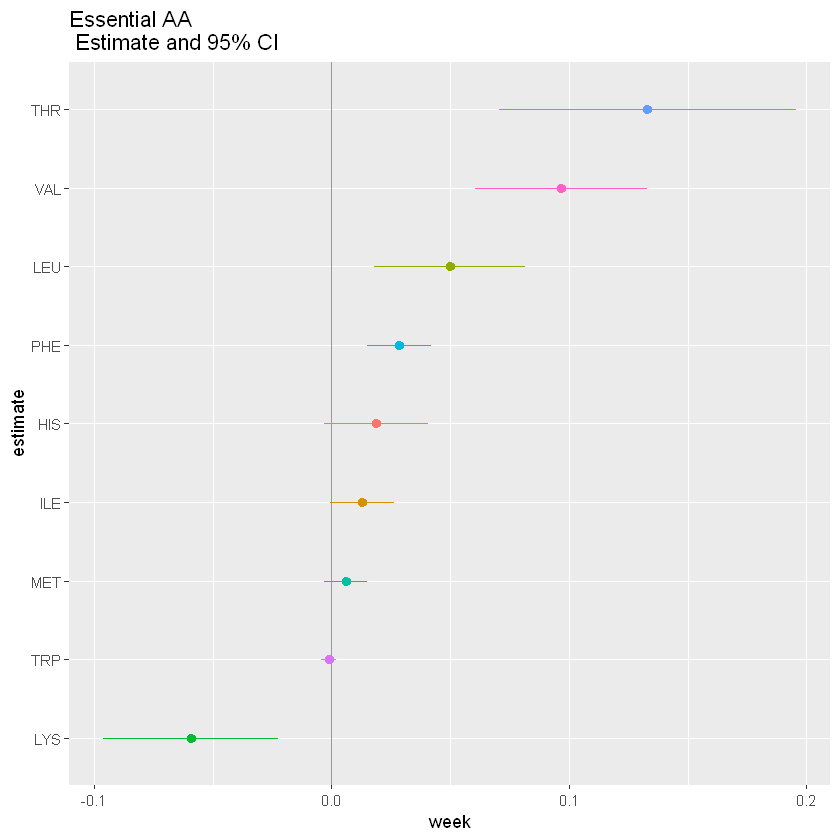

In [74]:
#png(filename="./plots/EAA_W_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(weekCoef_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + xlab('estimate') + ylab('week') + 
    ggtitle('Essential AA \n Estimate and 95% CI') 
#dev.off()

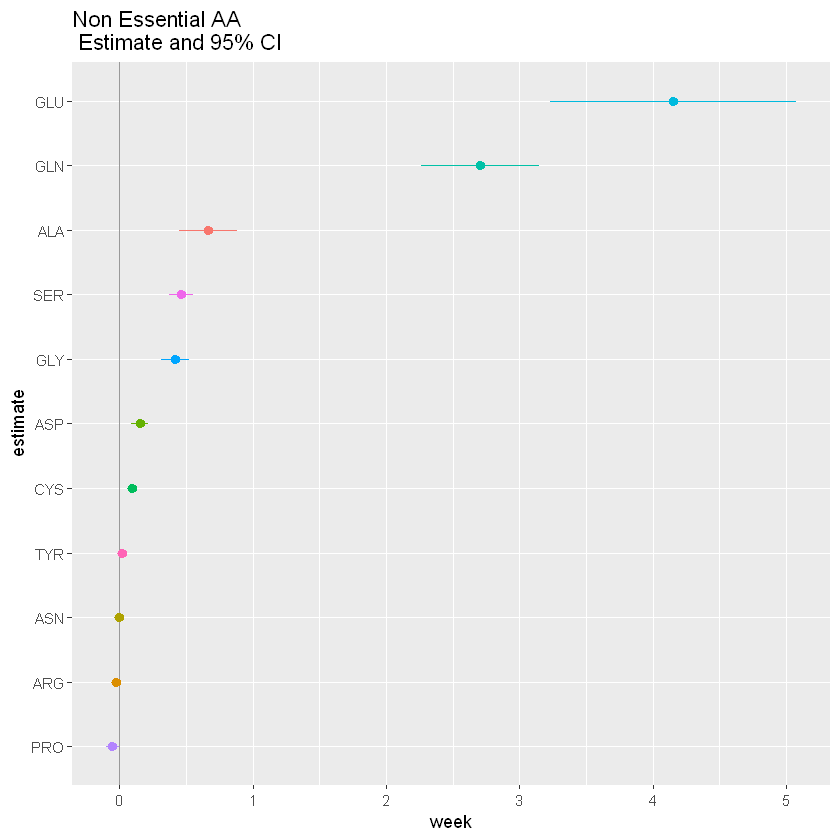

In [75]:
#png(filename="./plots/NEAA_W_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(weekCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() +  
    ggtitle('Non Essential AA \n Estimate and 95% CI') + xlab('estimate') + ylab('week') 
#dev.off()

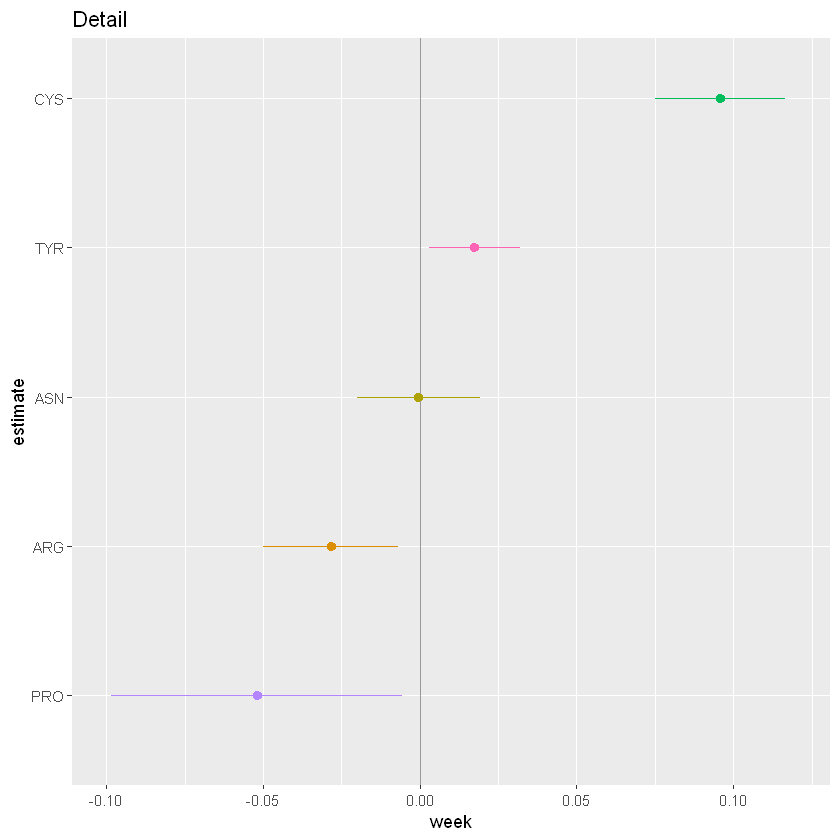

In [76]:
#png(filename="./plots/NEAA_W_coeff_detail.png", units="cm", width=20, height=20, res = 300)
ggplot(weekCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip(ylim = c(-0.1, 0.12), xlim = c(1, 4.8)) +  
    ggtitle('Detail') + xlab('estimate') + ylab('week') 
#dev.off()

In [77]:
AA_E %>% na.omit() %>% group_by(sex) %>% summarise(n())

AA_E %>% group_by(sex) %>% summarise(n())

35 - 16
26 - 12

sex,n()
girl,12
boy,16


sex,n()
girl,26
boy,35
NA,4


[1] 19

[1] 14

In [78]:
AA_E %>% group_by(sex) %>% summarise_all(funs(sum(is.na(.))))

sex,id,group,age,HISCalostrum,HISTransition,HISMature2m,HISMature4m,ILECalostrum,ILETransition,...,THRMature2m,THRMature4m,TRPCalostrum,TRPTransition,TRPMature2m,TRPMature4m,VALCalostrum,VALTransition,VALMature2m,VALMature4m
girl,0,0,0,0,6,11,9,0,6,...,11,9,0,6,11,9,0,6,11,9
boy,0,0,0,0,8,12,15,0,8,...,12,15,0,8,12,15,0,8,12,15
NA,0,0,0,0,3,3,4,0,3,...,3,4,0,3,3,4,0,3,3,4


In [82]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [93]:
#png(filename="./plots/EAA_coeff.png", units="cm", width=20, height=20, res = 300)
p1 <- 
    ggplot(sexCoef_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
        geom_hline(yintercept = 0, alpha = 0.4) + 
        geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
        theme(legend.position = "none") + 
        coord_flip() + 
        ggtitle('Essential AA') + xlab('') + ylab(TeX('sex (boy $\\rightarrow$)'))   
#dev.off()

In [94]:
#png(filename="./plots/NEAA_coeff.png", units="cm", width=20, height=20, res = 300)
p2 <- 
    ggplot(sexCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
        geom_hline(yintercept = 0, alpha = 0.4) + 
        geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
        theme(legend.position = "none") +
        coord_flip() +
        ggtitle('Non Essential AA') +  xlab('') + ylab(TeX('sex (boy $\\rightarrow$)')) 
#dev.off()

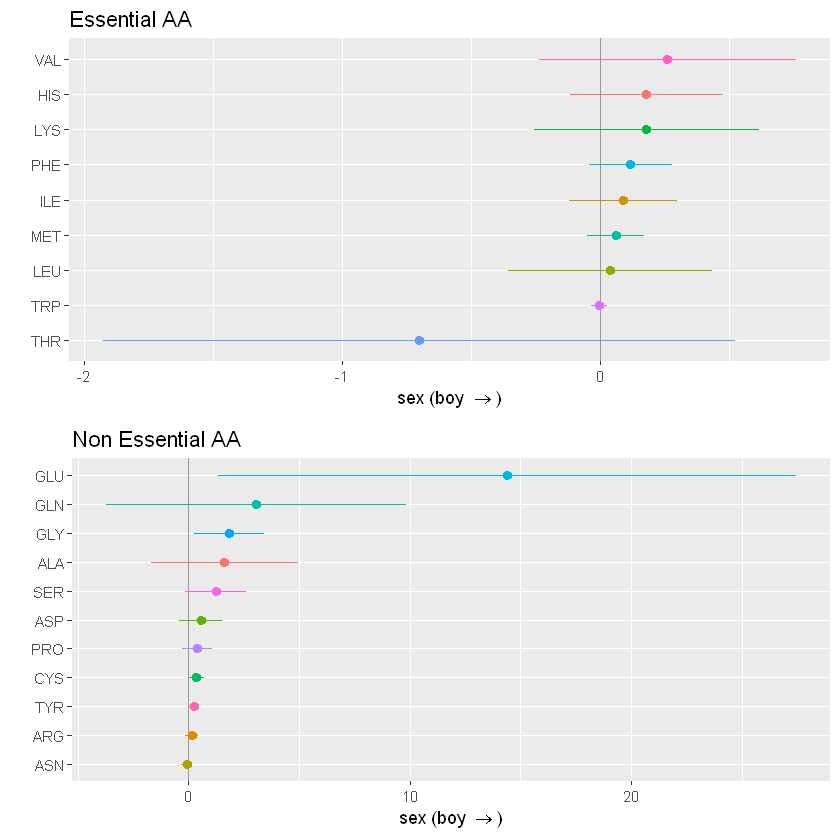

In [95]:
multiplot(p1, p2, cols=1)